<b>Introduction

The 'Energy_gdp.csv' dataset provides crucial information on energy consumption from 1965 to 2025 for 66 countries worldwide. The data includes breakdowns of energy consumption across eight different fuel types, and the countries are categorized into seven regions and three income groups. Additionally, the dataset includes columns related to GDP, population, and other economic indicators.

Key questions to explore:

Q1. How has global energy consumption evolved from 1965 to 2025?

Q2. Is there any significant rise in renewable enery usages?

Q3. Which countries are leading in the utilization of each fuel type when measured by energy consumption per capita?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Energy_gdp.csv', index_col=0)
df.head()

Country  Year  Total_Energy_Consumption_EJ  Energy Consumption EJ  \
0  Canada  1965                      5.00053               0.647949   
1  Canada  1965                      5.00053               0.000000   
2  Canada  1965                      5.00053               1.257066   
3  Canada  1965                      5.00053               0.001308   
4  Canada  1965                      5.00053               2.314145   

             Fuel type         Region Income group  GDP (nominal, 2023)  \
0                 Coal  North America  High income        2142470000000   
1  Geo Biomass & other  North America  High income        2142470000000   
2           Hydropower  North America  High income        2142470000000   
3       Nuclear Energy  North America  High income        2142470000000   
4                  Oil  North America  High income        2142470000000   

     GDP (abbrev.)  GDP growth  Population -2023  GDP per capita  \
0  $2.142 trillion      0.0125          39299105           54517   
1  $2.142 trillion      0.0125          39299105           54517   
2  $2.142 trillion      0.0125          39299105           54517   
3  $2.142 trillion      0.0125          39299105           54517   
4  $2.142 trillion      0.0125          39299105           54517   

   Share of World GDP  
0              0.0202  
1              0.0202  
2              0.0202  
3              0.0202  
4              0.0202

In [3]:
df.Region.unique()

array(['North America', 'Latin America & Caribbean',
       'Europe & Central Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'East Asia & Pacific', 'South Asia'],
      dtype=object)

<b>Global Energy Consumption Trends (1965-2025): A Regional Analysis

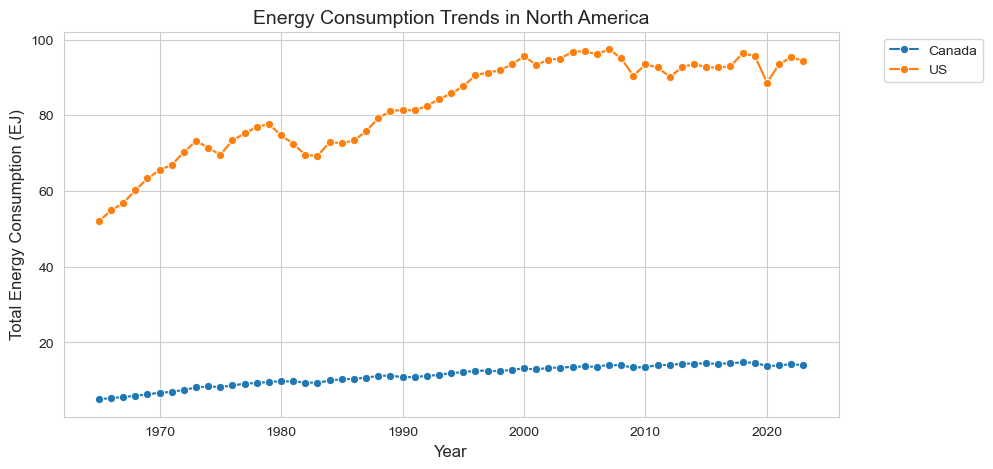

In [4]:
sns.set_style("whitegrid")

df_North_America = df[df["Region"] == 'North America']  # Filtering data by region
plt.figure(figsize=(10, 5))  
sns.lineplot(data=df_North_America, x="Year", y="Total_Energy_Consumption_EJ", hue="Country", marker="o")
    
plt.title(f"Energy Consumption Trends in North America", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
    
plt.show()  

<b>The United States exhibits a significantly higher energy consumption compared to Canada, with a steady upward trend over the years, although occasional dips are noticeable. In contrast, Canada’s energy consumption curve, while still showing a consistent increase, is much less steep compared to the US. This is due to the US having a larger population, a more diverse industrial base, and a higher overall demand for energy across various sectors. 

In [6]:
# Filter the data for Latin America & Caribbean region
df_Latin_America_Caribbean = df[df.Region == 'Latin America & Caribbean']

# Define the main countries
main_countries = {'Brazil', 'Mexico', 'Argentina'}

# Create a new column: Keep main countries, group others into 'Other Latin America'
df_Latin_America_Caribbean["Country_Grouped"] = df_Latin_America_Caribbean["Country"].apply(
    lambda x: x if x in main_countries else "Other Latin America"
)

C:\Users\User\AppData\Local\Temp\ipykernel_16212\1989933316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Latin_America_Caribbean["Country_Grouped"] = df_Latin_America_Caribbean["Country"].apply(


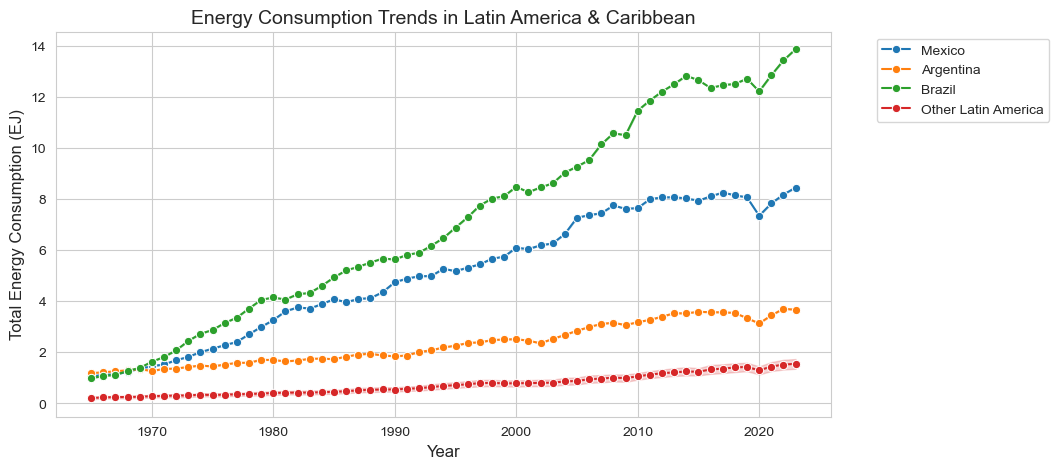

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_Latin_America_Caribbean,
    x="Year",
    y="Total_Energy_Consumption_EJ",
    hue="Country_Grouped",  # Using the new grouped column
    marker="o"
)

plt.title(f"Energy Consumption Trends in Latin America & Caribbean", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))

plt.show()

<b>Among the countries in Latin America & the Caribbean, Brazil, Mexico, and Argentina stand out with significant increases in energy consumption. 

<b>Brazil leads the pack, followed by Mexico and Argentina. Interestingly, the rate of increase in energy consumption varies greatly among these three countries, with Brazil showing the steepest rise. This difference could be attributed to various factors such as differing levels of industrialization, population growth, and energy policies in each country. Brazil's rapid energy demand could also be linked to its large-scale infrastructure projects and growing industrial base.

In [9]:
# Countries in the Europe & Central Asia
df[df.Region == 'Europe & Central Asia']['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Azerbaijan', 'Belarus', 'Kazakhstan',
       'Uzbekistan'], dtype=object)

In [10]:
# Grouping the Europe & Central Asia countries 
regions = {
    "Western Europe": ["Austria", "Belgium", "France", "Germany", "Ireland", "Luxembourg", 
                       "Netherlands", "Switzerland", "United Kingdom"],

    "Southern Europe": ["Croatia", "Cyprus", "Greece", "Italy", "Portugal", "Spain", "Slovenia"],

    "Northern Europe": ["Denmark", "Estonia", "Finland", "Iceland", "Latvia", "Lithuania", 
                        "Norway", "Sweden"],

    "Eastern Europe": ["Bulgaria", "Hungary", "Poland", "Romania", "Ukraine", "Belarus"],

    "Post-Soviet States (Eurasia)": ["Azerbaijan", "Kazakhstan", "Uzbekistan", "North Macedonia"]
}

In [11]:
# Definning the Western Europe groupe
df_western_europe = df[df["Country"].isin(regions["Western Europe"])]

# Definning the main countries
main_countries_weur = {'United Kingdom', 'France', 'Germany'}

# Creating a new column: Keeping main countries, group others into 'Other Latin America'
df_western_europe["Country_Grouped"] = df_western_europe["Country"].apply(
    lambda x: x if x in main_countries_weur else "Other Western Europe"
)

C:\Users\User\AppData\Local\Temp\ipykernel_16212\115938291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_western_europe["Country_Grouped"] = df_western_europe["Country"].apply(


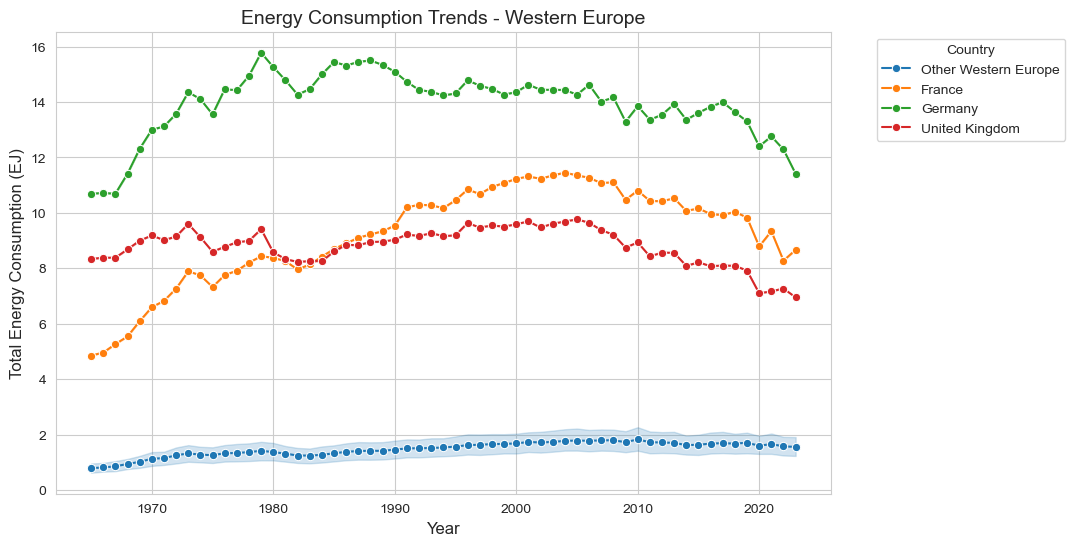

In [12]:
sns.set_style("whitegrid")

# **Western Europe** Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_western_europe, x="Year", y="Total_Energy_Consumption_EJ", hue="Country_Grouped", marker="o")
plt.title("Energy Consumption Trends - Western Europe", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(title="Country", loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.show()

<b>Germany, France, and the United Kingdom have consistently been the frontrunners in energy consumption over the years. However, recent trends show a noticeable decline in energy consumption for these nations. Interestingly, around 1985, France's energy consumption surged past that of the United Kingdom, marking a significant shift. 

<b>During the 1980s, France experienced an economic boost, which might have led to higher industrial energy needs, further contributing to the rise in consumption.

<b>France made a significant investment in nuclear energy starting in the 1970s, and by 1985, it had expanded its nuclear power plants, becoming one of the world leaders in nuclear energy generation. This increase in nuclear energy likely contributed to the surge in France’s overall energy consumption.

In [14]:
# Definning the Southern Europe groupe
df_southern_europe = df[df["Country"].isin(regions["Southern Europe"])]

# Definning the main countries
main_countries_seur = {'Italy', 'Spain'}

# Creating a new column: Keeping main countries, group others into 'Other Latin America'
df_southern_europe["Country_Grouped"] = df_southern_europe["Country"].apply(
    lambda x: x if x in main_countries_seur else "Other Southren Europe"
)

C:\Users\User\AppData\Local\Temp\ipykernel_16212\694397421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southern_europe["Country_Grouped"] = df_southern_europe["Country"].apply(


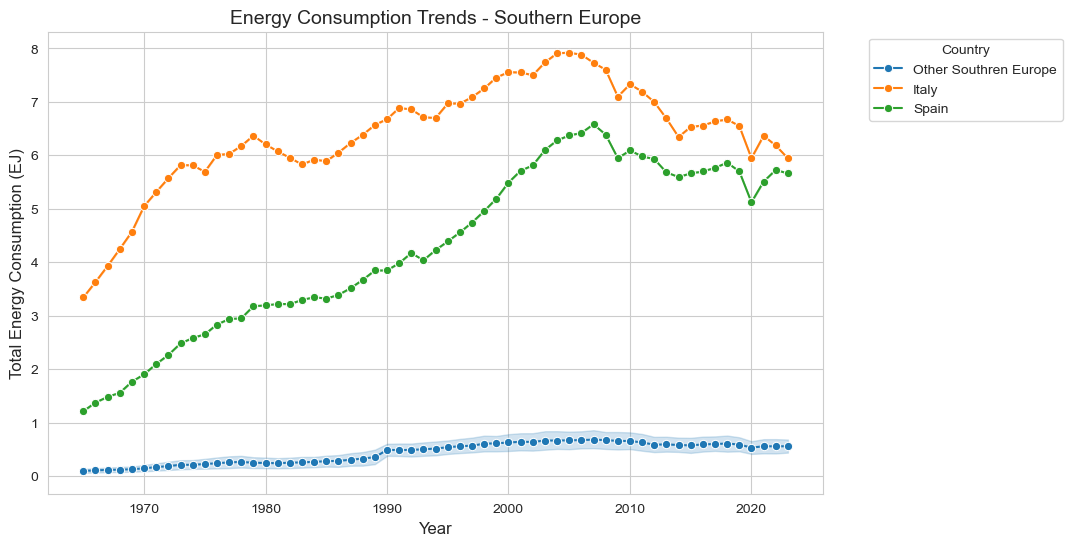

In [15]:
# **Southern Europe** Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_southern_europe, x="Year", y="Total_Energy_Consumption_EJ", hue="Country_Grouped", marker="o")

plt.title("Energy Consumption Trends - Southern Europe", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(title="Country", loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.show()

<b>Italy and Spain have been leading the pack in energy consumption, with Italy consistently maintaining the lead. Both countries experienced a steady increase in power consumption up until 2005, driven by industrial growth, urbanization, and overall economic development. However, after 2005, we observe a steady decline in energy consumption, which is likely due to factors such as improved energy efficiency, economic shifts, and the rise of renewable energy sources. 

<b>A sharp dip in 2020 could be attributed to the economic slowdown caused by the global pandemic, which led to reduced industrial activity, travel restrictions, and a significant decline in overall energy demand.

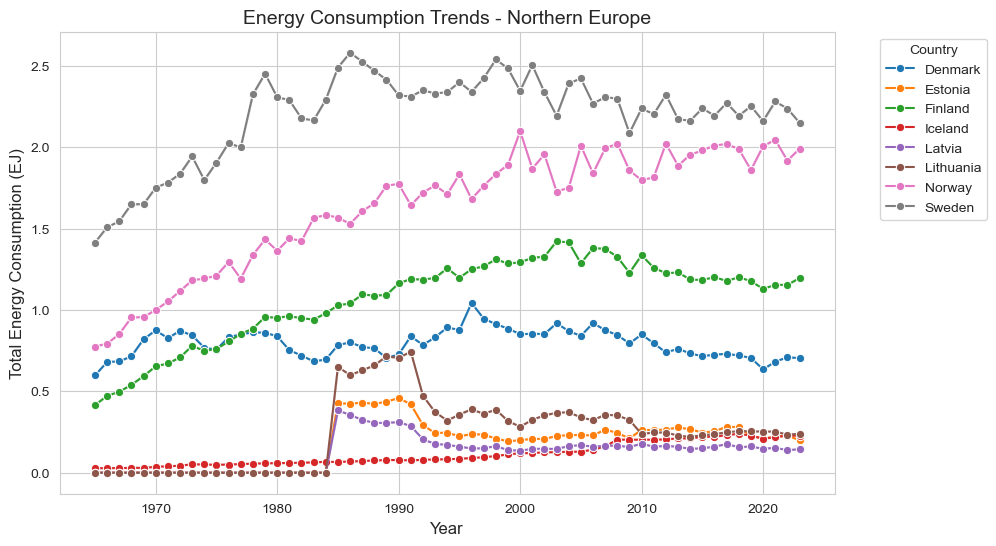

In [17]:
# **Northern Europe** Plot
df_northern_europe = df[df["Country"].isin(regions["Northern Europe"])]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_northern_europe, x="Year", y="Total_Energy_Consumption_EJ", hue="Country", marker="o")
plt.title("Energy Consumption Trends - Northern Europe", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(title="Country", loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.show()

<b>Sweden, Norway, Finland, and Denmark are leading the pack in energy consumption, with Sweden consistently at the forefront. 

<b>Interestingly, the total energy consumption trend for Lithuania, Estonia, and Latvia seems to begin around 1985 and much higher for the period 1985-1990, which could correlate with the period when these countries gained independence from the Soviet Union or underwent significant political and economic changes. From this point onward, a steady decline in energy consumption is observed, possibly driven by factors such as economic restructuring, energy efficiency improvements, and a transition to more sustainable energy sources.

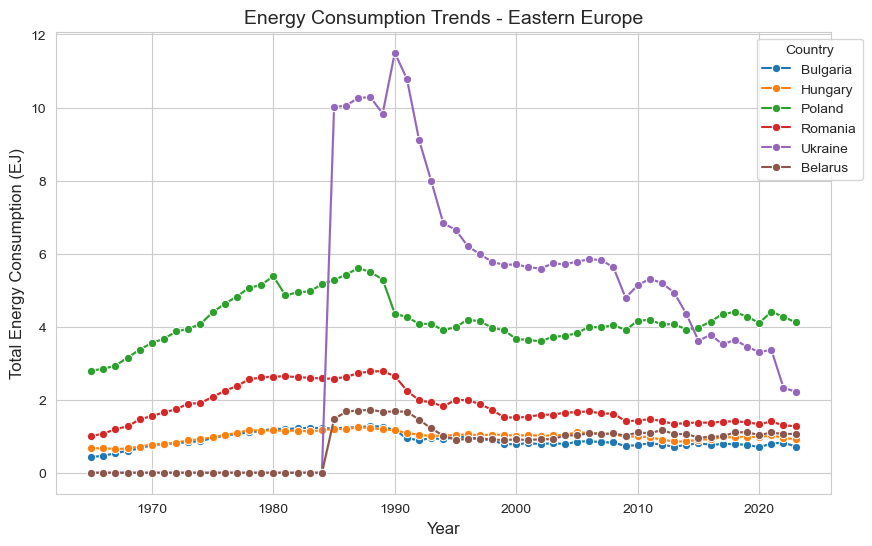

In [19]:
# **Eastern Europe** Plot
df_eastern_europe = df[df["Country"].isin(regions["Eastern Europe"])]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_eastern_europe, x="Year", y="Total_Energy_Consumption_EJ", hue="Country", marker="o")
plt.title("Energy Consumption Trends - Eastern Europe", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(title="Country", loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.show()

<b>The start of energy consumption trend around 1985 for Ukraine and Belarus is indicative of their separation from the USSR during that time, with Ukraine showing a significantly higher peak. This could be linked to the initial industrial and infrastructural adjustments post-independence. Following this peak, both countries experienced a rapid decline in energy consumption, possibly due to economic struggles and reduced industrial activity after the dissolution of the Soviet Union.

<b>In contrast, Poland exhibits a steadier energy consumption trend, with occasional rises and falls, reflecting a more stable energy demand and gradual industrial growth during its transition to a market economy. However, the sharp decline in Ukraine's energy consumption after 2020 is particularly striking and likely reflects the severe impact of Russia's invasion, which has disrupted infrastructure and energy supply.

<b>Presently, Poland is leading the pack in terms of energy consumption among these countries, demonstrating more consistent growth and stability. Poland's relatively stronger economy and integration into European markets might be factors contributing to its more resilient energy consumption trend.

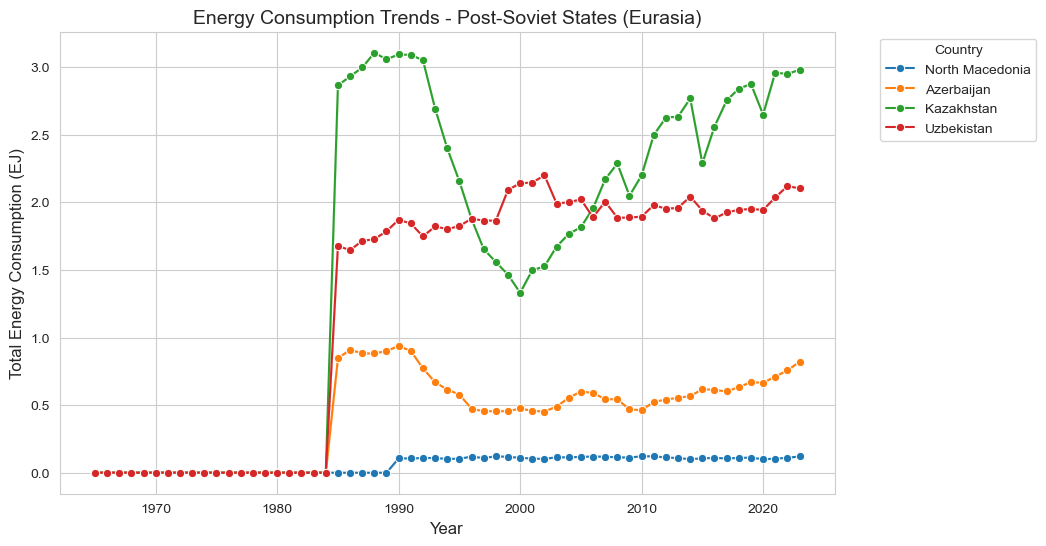

In [21]:
# **Post-Soviet States (Eurasia)** Plot
df_post_soviet = df[df["Country"].isin(regions["Post-Soviet States (Eurasia)"])]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_post_soviet, x="Year", y="Total_Energy_Consumption_EJ", hue="Country", marker="o")
plt.title("Energy Consumption Trends - Post-Soviet States (Eurasia)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Consumption (EJ)", fontsize=12)
plt.legend(title="Country", loc="best", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.show()

<b>The four countries show clear distinctions in terms of total energy consumption, all beginning their trends around 1985. Kazakhstan, starting at the highest point, exhibits the most fluctuations in energy consumption. A notable decrease in energy use can be observed from 1992 to 2000, possibly due to the economic transition and restructuring post-Soviet Union. After 2000, Kazakhstan's energy consumption steadily increases, with occasional dips that could correlate with economic cycles or energy efficiency improvements.

<b>Uzbekistan, ranked second, demonstrates a more stable and consistent growth trajectory, suggesting a relatively smoother transition in energy demands compared to Kazakhstan. Azerbaijan, in third, shows a decline in energy consumption after 1990, which might reflect economic challenges or shifts in industrial activity. However, since 2010, there has been a steady increase, potentially driven by oil and gas exports or rising energy needs with economic development.

<b>North Macedonia, ranked last, displays a flat energy consumption trend, indicating relatively stable or low growth in energy demand. This could suggest that the country's energy infrastructure or industrial activity has remained constant over the years, with limited fluctuations.

<b>Overall, the energy consumption trends of these countries seem to reflect both their economic transitions and regional factors, with Kazakhstan showing the highest volatility, while North Macedonia's trend remains the most stable

In [23]:
df.head()

Country  Year  Total_Energy_Consumption_EJ  Energy Consumption EJ  \
0  Canada  1965                      5.00053               0.647949   
1  Canada  1965                      5.00053               0.000000   
2  Canada  1965                      5.00053               1.257066   
3  Canada  1965                      5.00053               0.001308   
4  Canada  1965                      5.00053               2.314145   

             Fuel type         Region Income group  GDP (nominal, 2023)  \
0                 Coal  North America  High income        2142470000000   
1  Geo Biomass & other  North America  High income        2142470000000   
2           Hydropower  North America  High income        2142470000000   
3       Nuclear Energy  North America  High income        2142470000000   
4                  Oil  North America  High income        2142470000000   

     GDP (abbrev.)  GDP growth  Population -2023  GDP per capita  \
0  $2.142 trillion      0.0125          39299105           54517   
1  $2.142 trillion      0.0125          39299105           54517   
2  $2.142 trillion      0.0125          39299105           54517   
3  $2.142 trillion      0.0125          39299105           54517   
4  $2.142 trillion      0.0125          39299105           54517   

   Share of World GDP  
0              0.0202  
1              0.0202  
2              0.0202  
3              0.0202  
4              0.0202

In [24]:
df['Fuel type'].unique()

array(['Coal', 'Geo Biomass & other', 'Hydropower', 'Nuclear Energy',
       'Oil', 'Solar', 'Wind', 'Natural gas'], dtype=object)

<b>Trend Analysis of Renewable Energy Sources: Growth and Overall Insights

<b>Solar

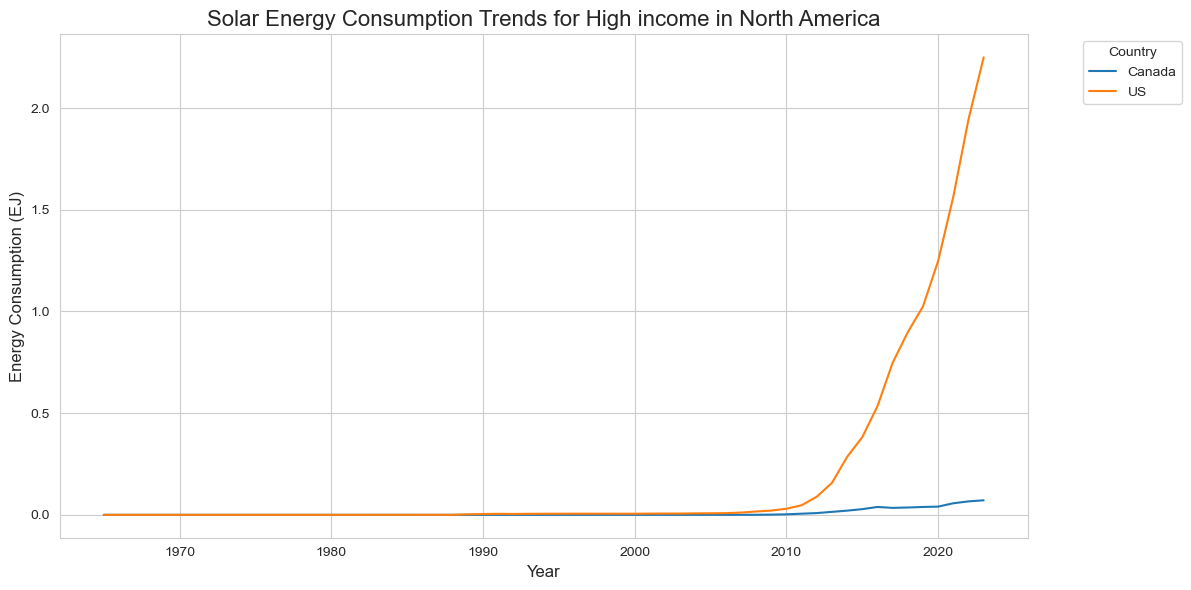

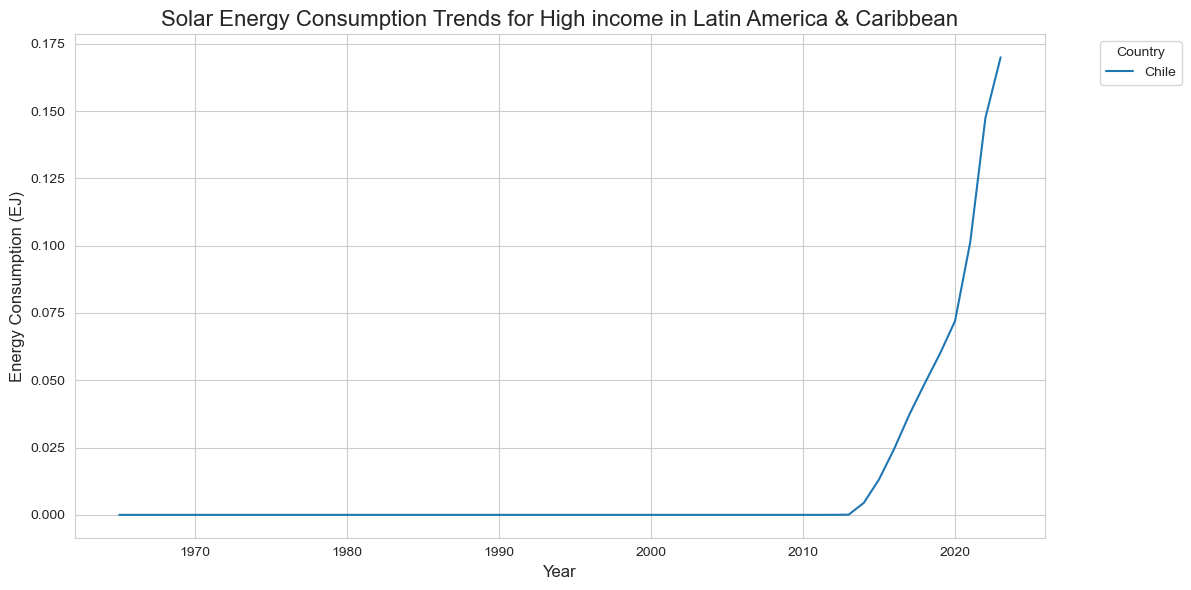

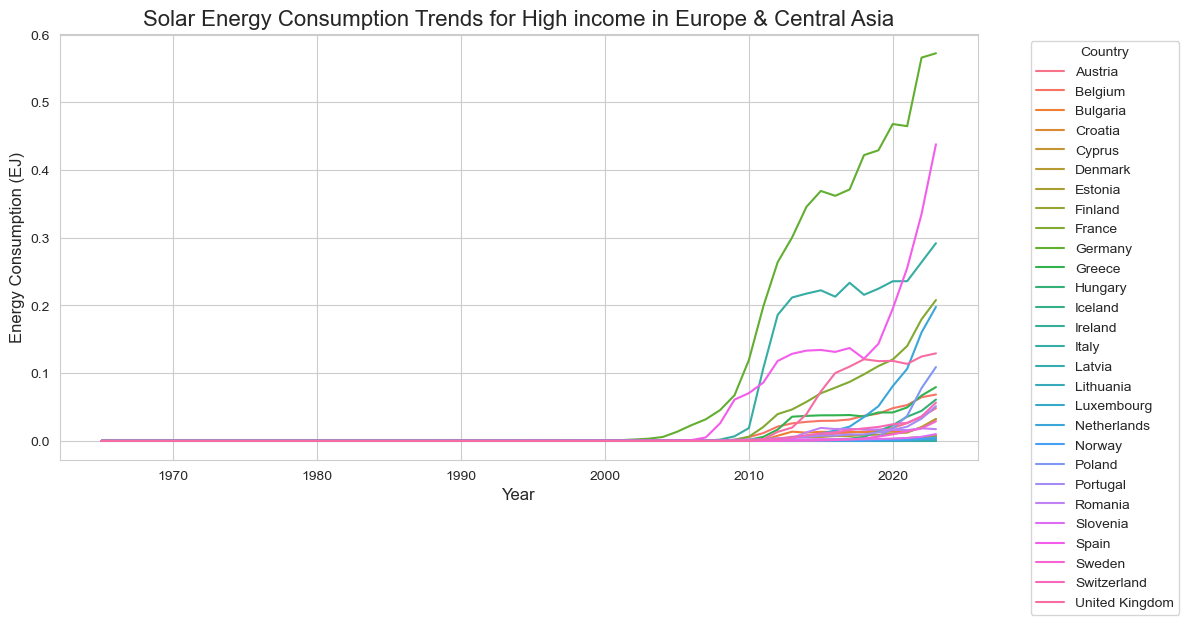

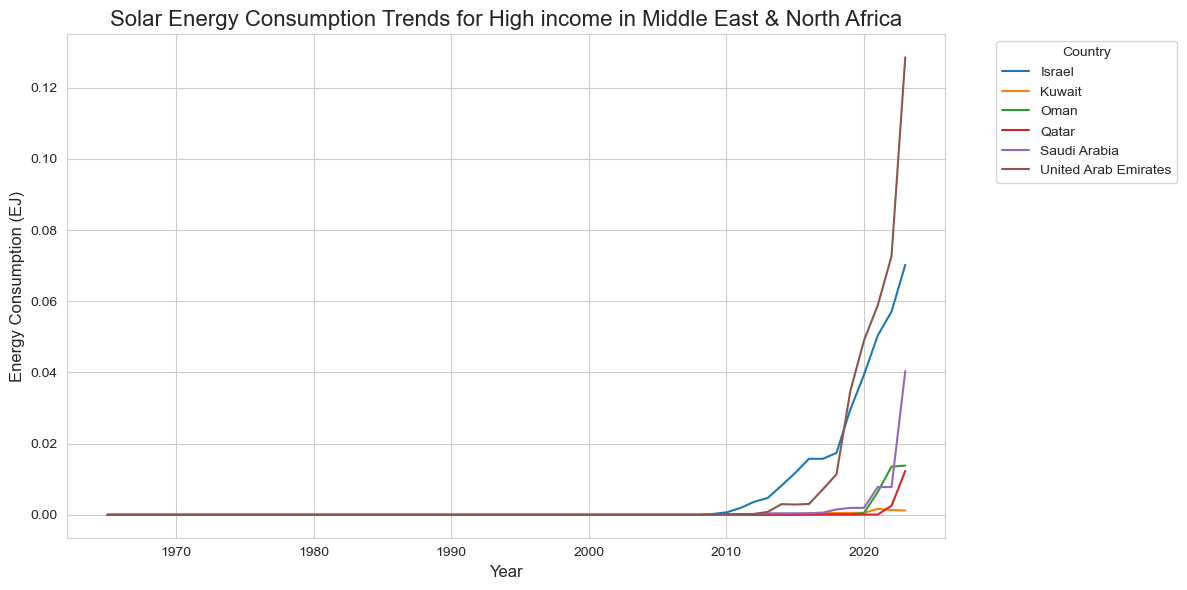

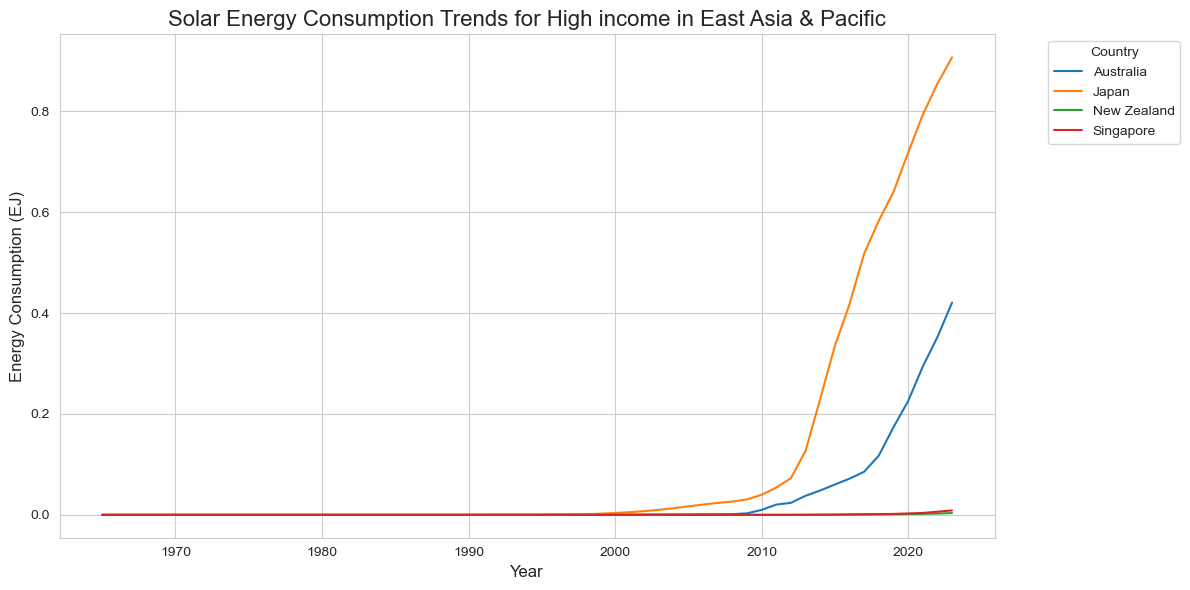

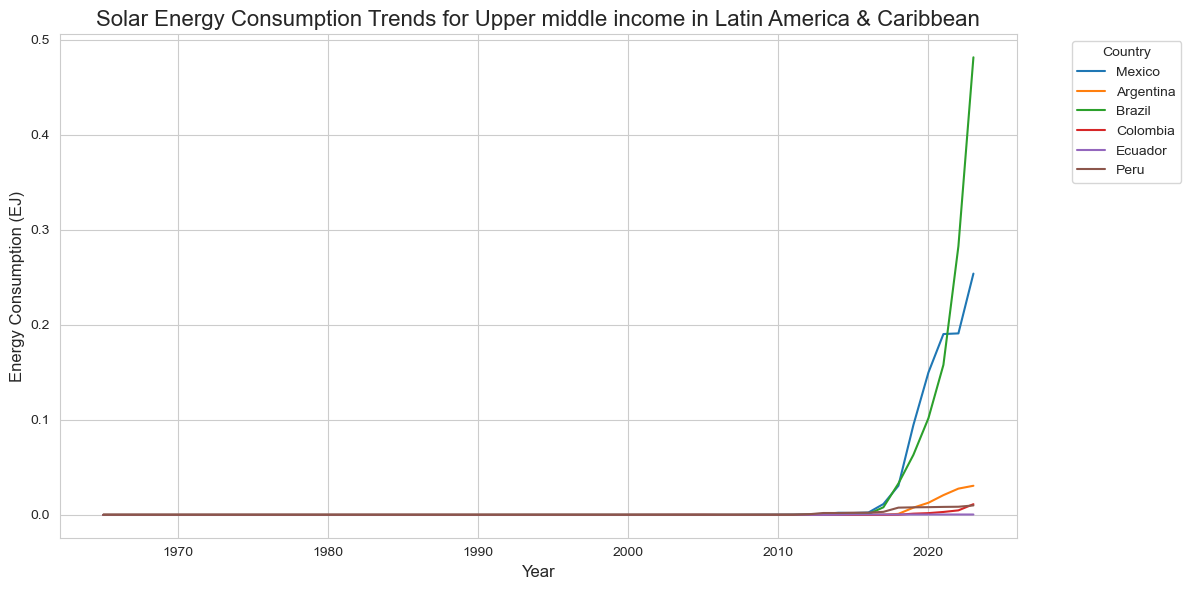

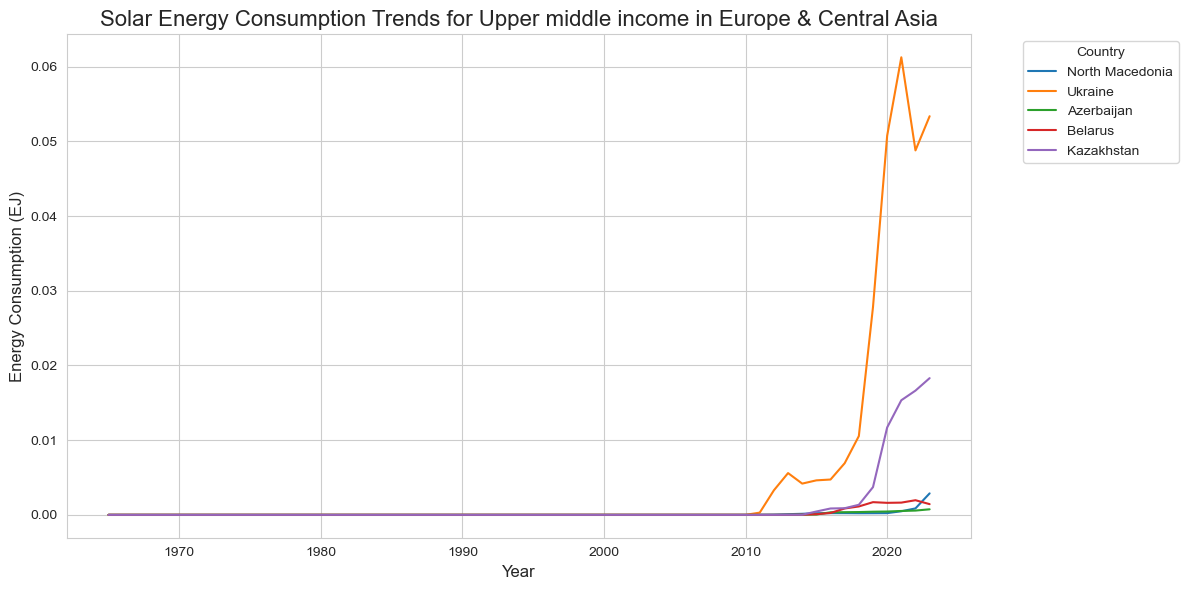

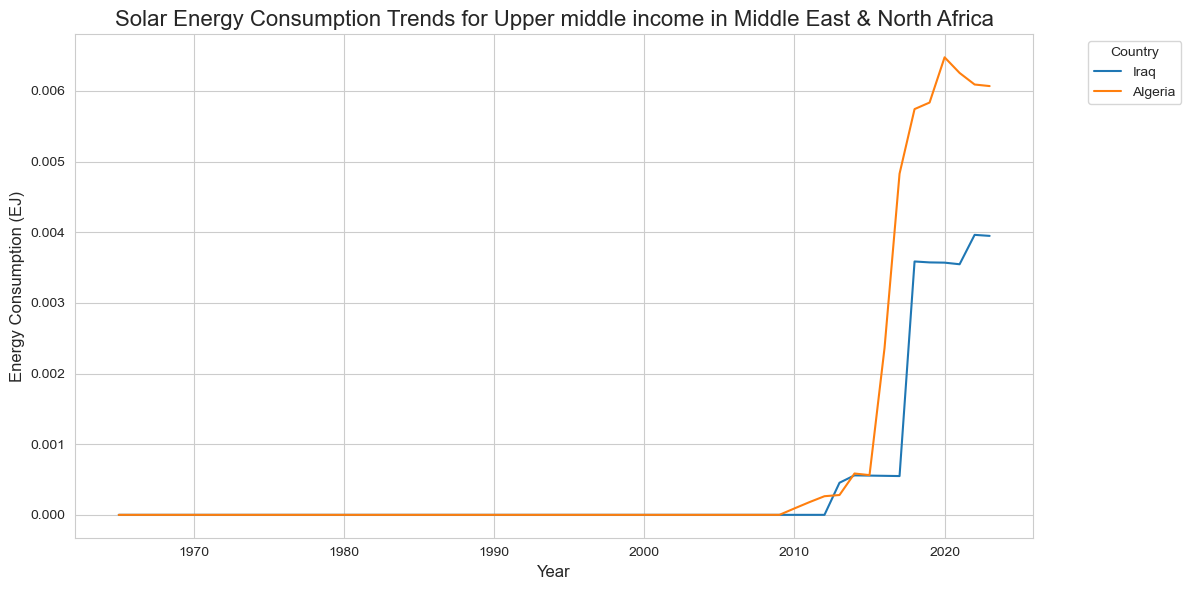

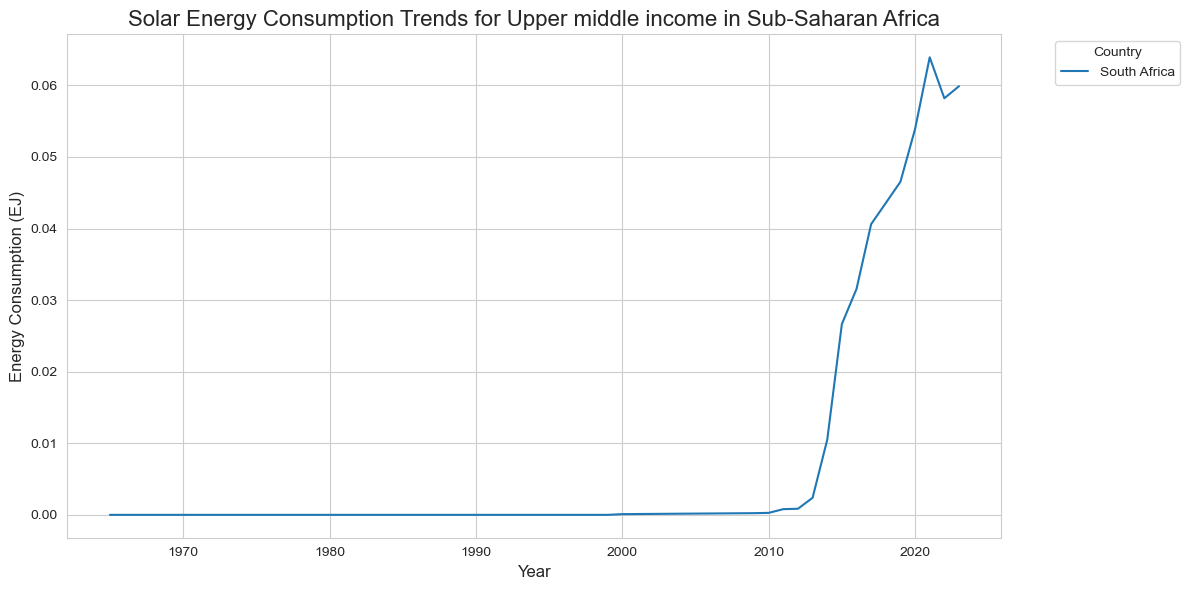

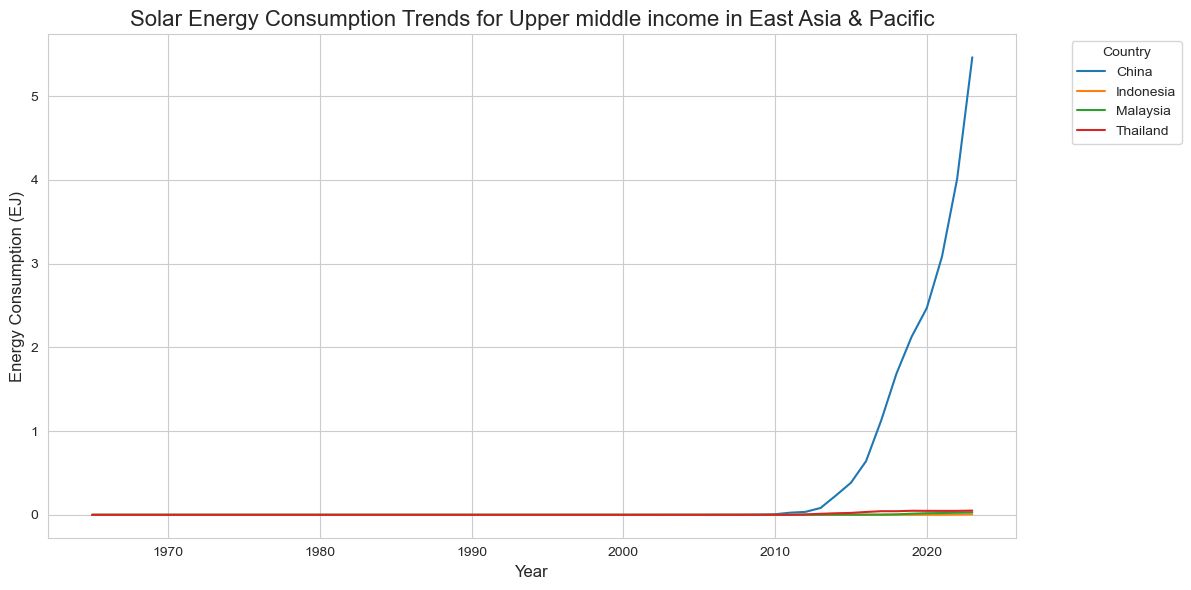

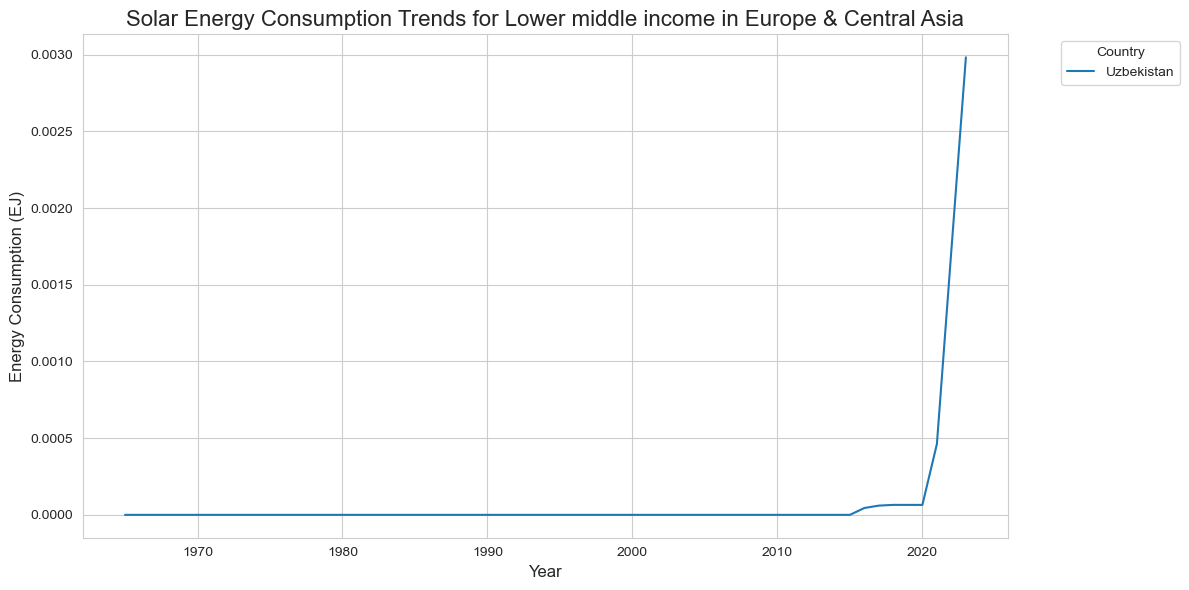

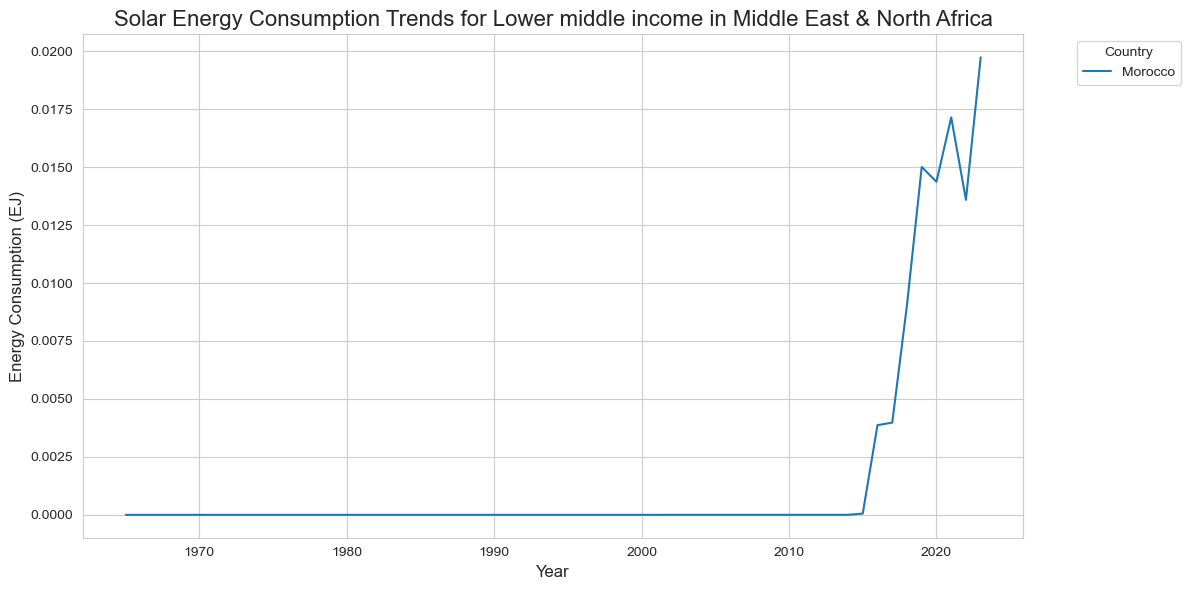

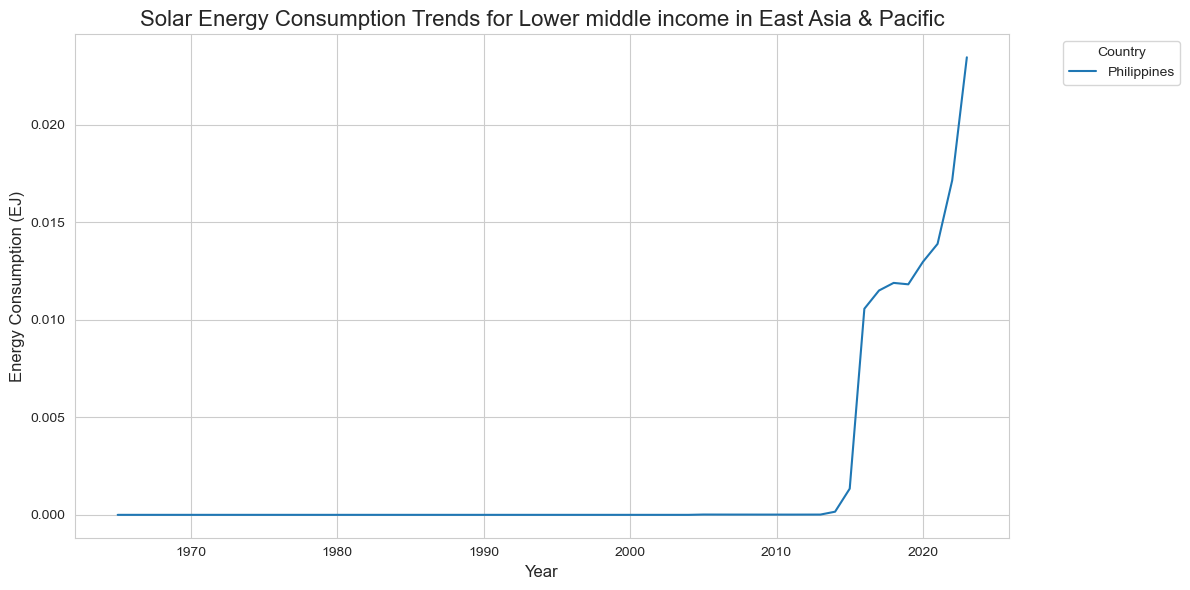

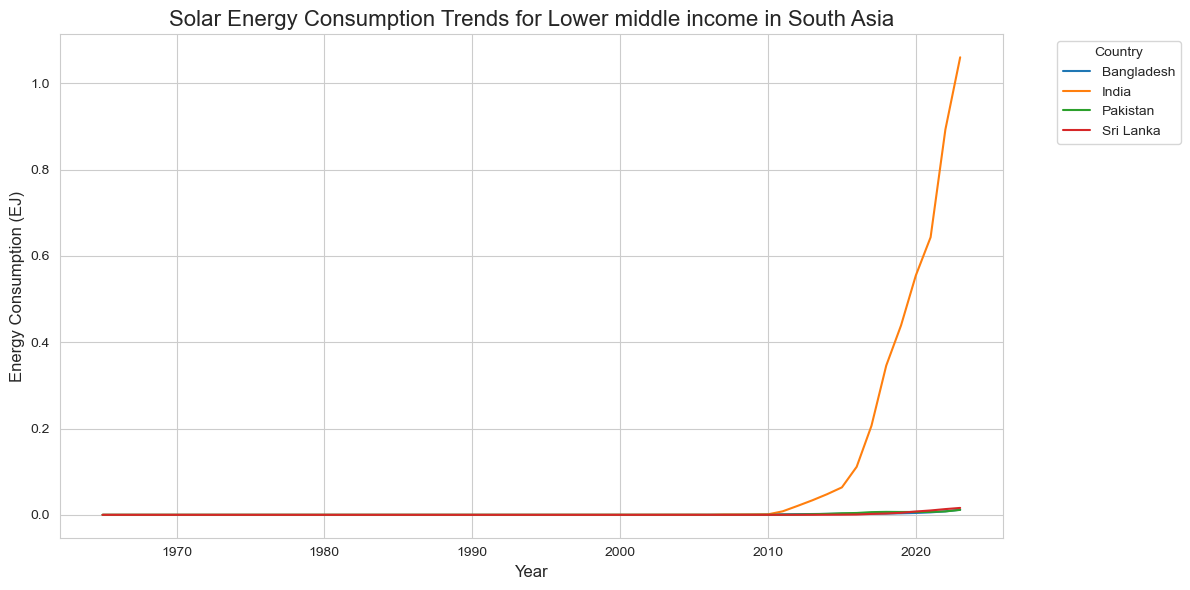

In [27]:
# Creating a list of unique income groups
income_groups = df['Income group'].unique()

# Creating a list of unique regions
regions = df['Region'].unique()

# Creating separate plots for each combination of income group and region
for income_group in income_groups:
    for region in regions:
        # Filter data for the current income group and region, and select only 'Solar' fuel type
        df_filtered = df[(df['Income group'] == income_group) & (df['Region'] == region) & (df['Fuel type'] == 'Solar')]
        
        # Check if there is data for the current combination
        if not df_filtered.empty:
            
            # Creating a plot for the current income group and region
            plt.figure(figsize=(12, 6))
            
            # Plotting the trend for Solar energy consumption for each country in this income group and region
            sns.lineplot(data=df_filtered, x="Year", y="Energy Consumption EJ", hue="Country", markers=True)
            
            # Title and labels
            plt.title(f"Solar Energy Consumption Trends for {income_group} in {region}", fontsize=16)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Energy Consumption (EJ)", fontsize=12)
            
            # Showing the legend
            plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
            
            plt.tight_layout()
            plt.show()

<b>Solar energy consumption is consistently increasing across all countries, regardless of region or income group.

<b>Geo Biomass & other

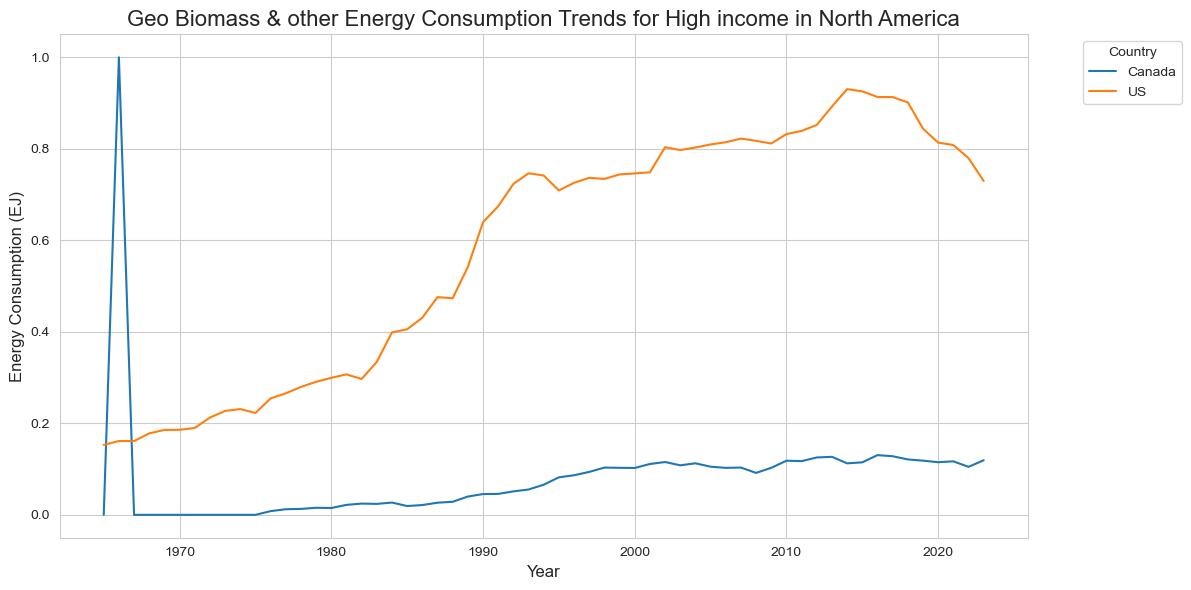

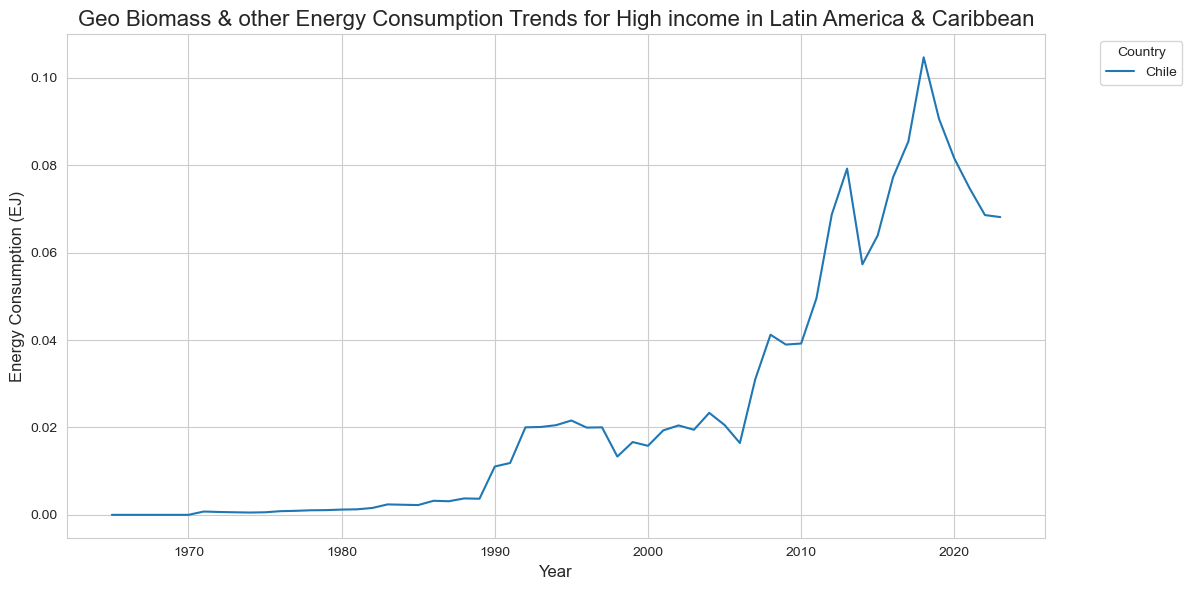

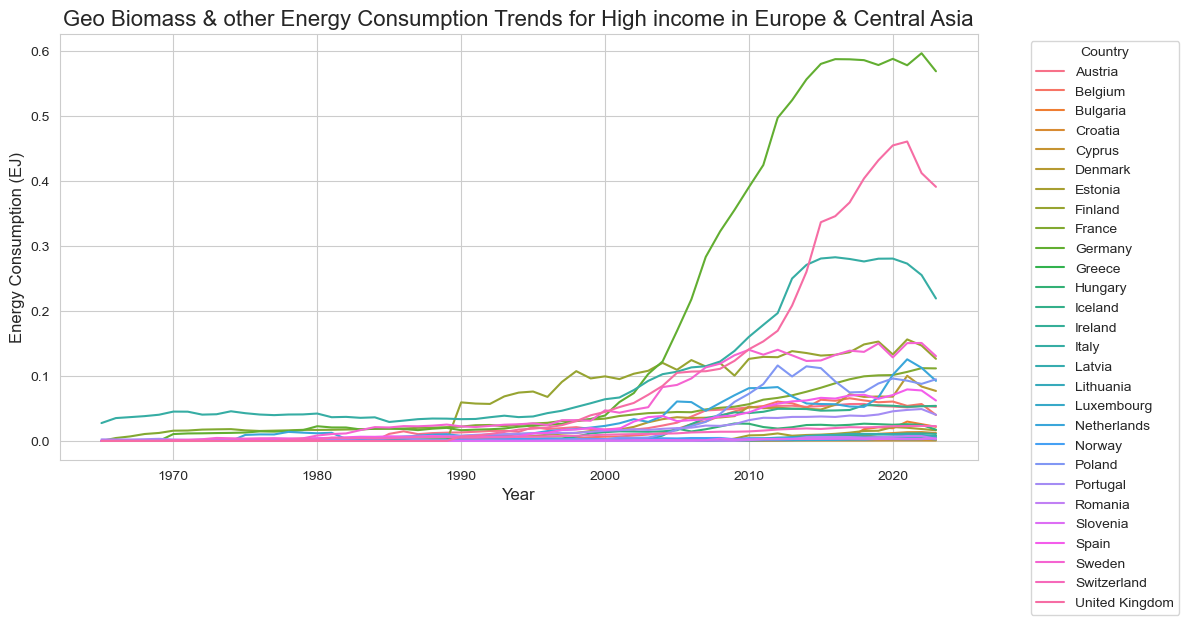

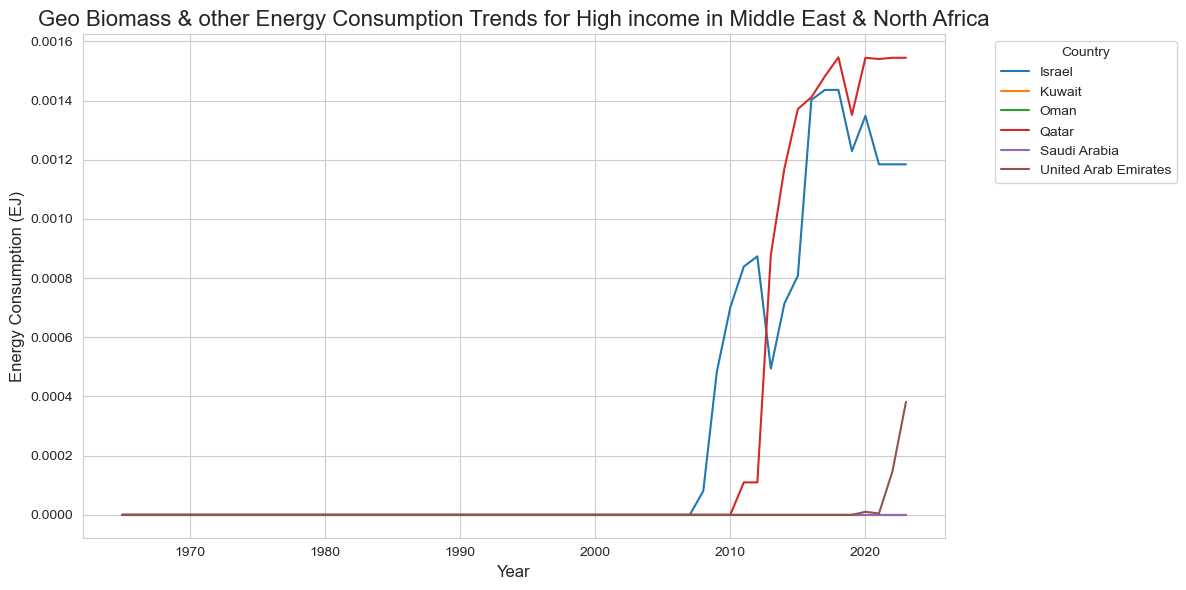

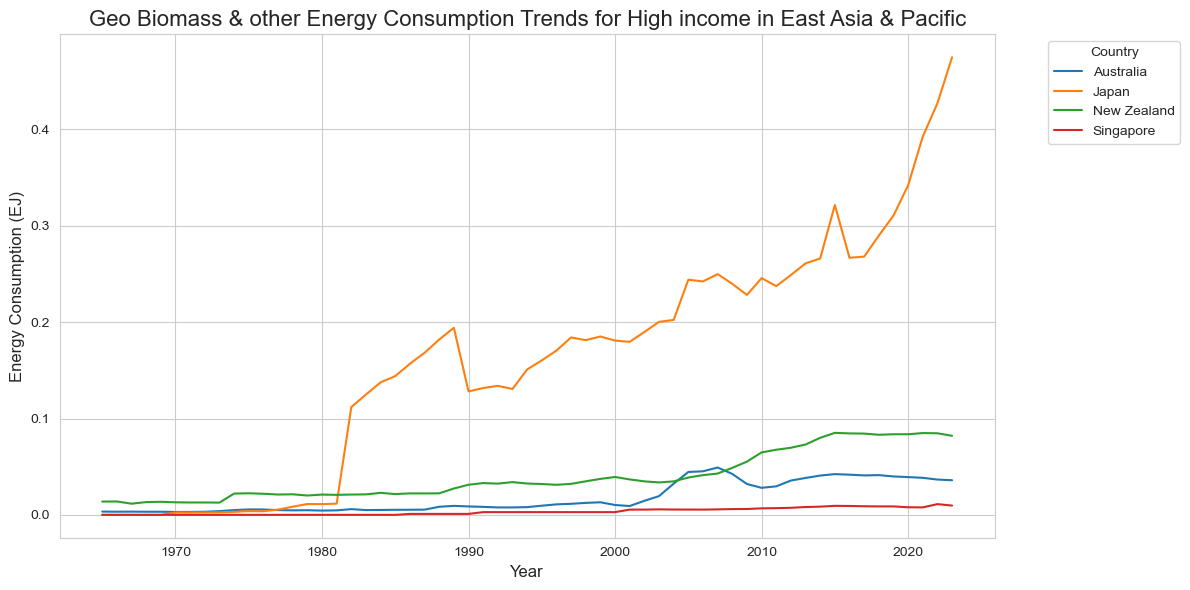

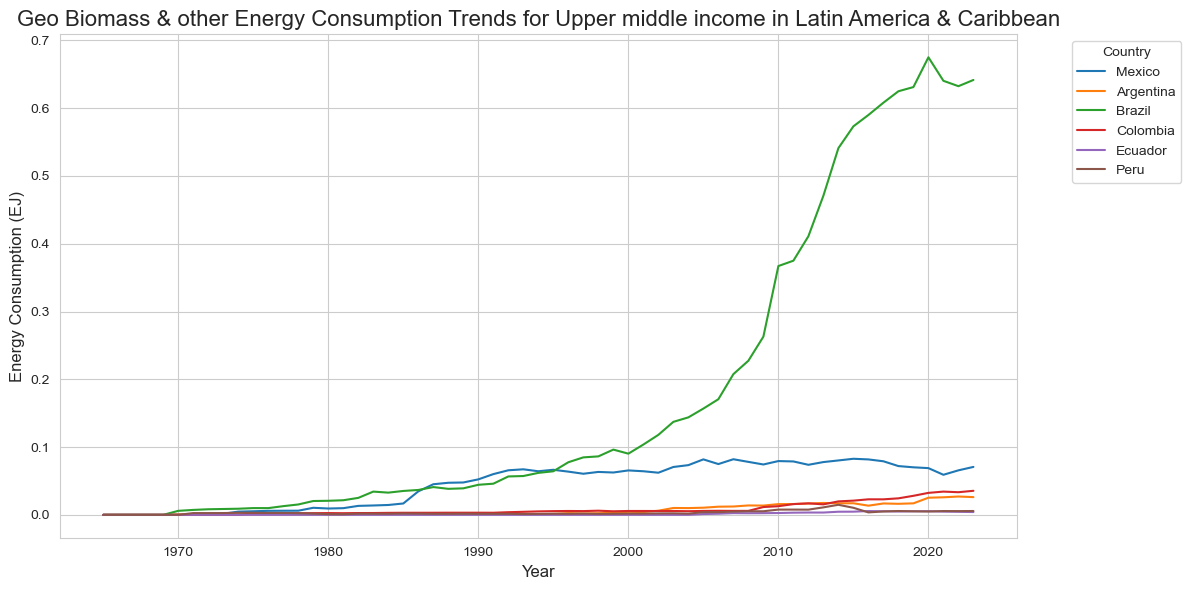

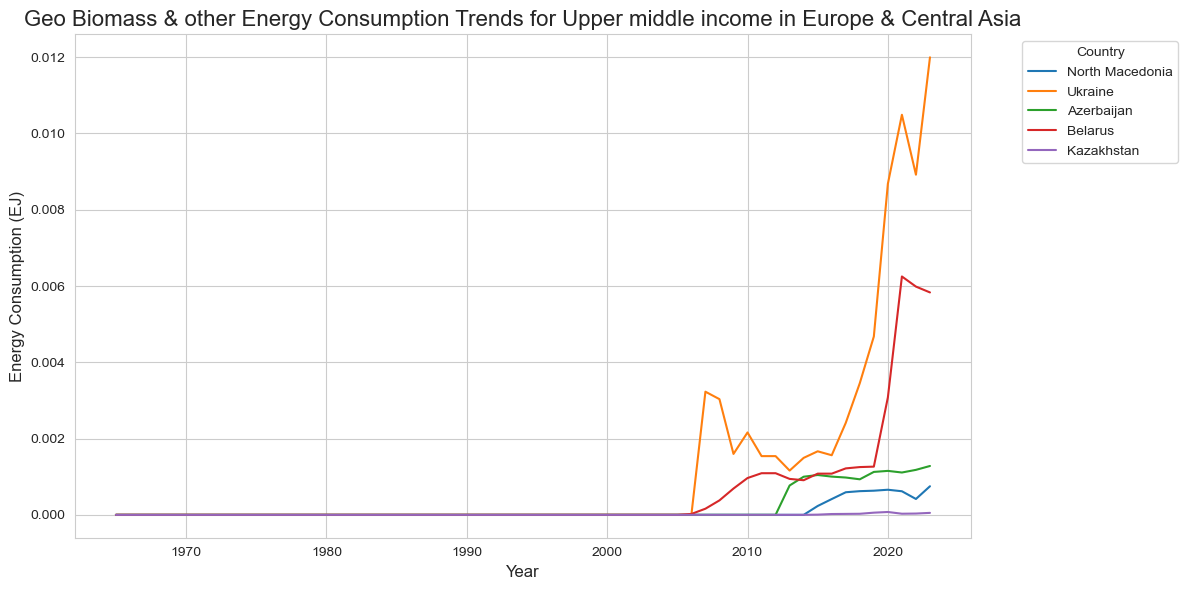

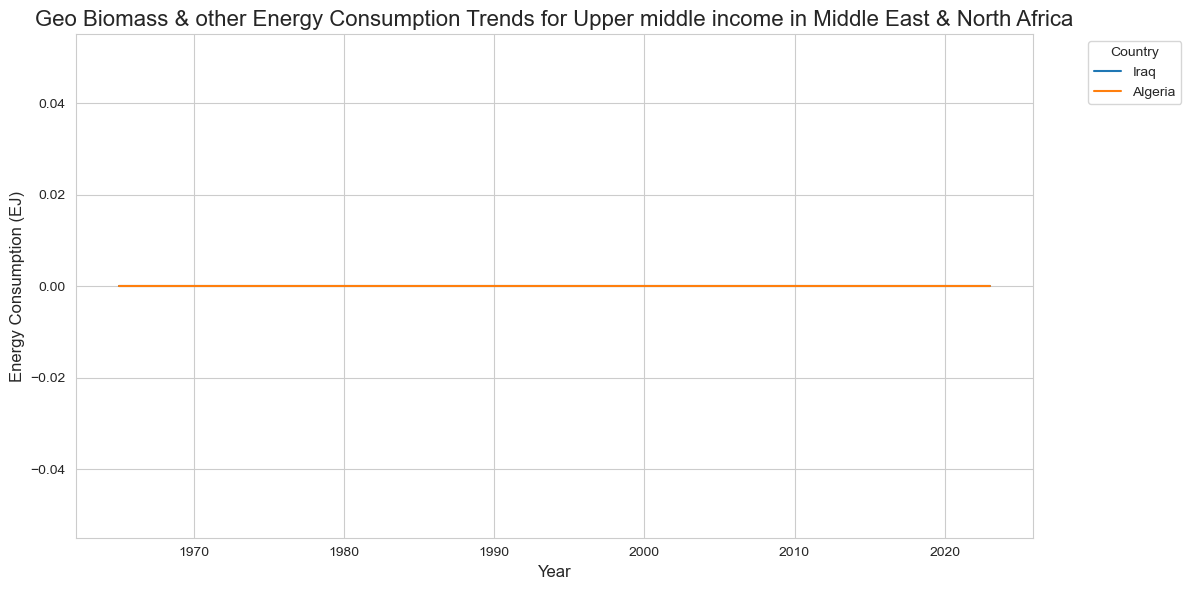

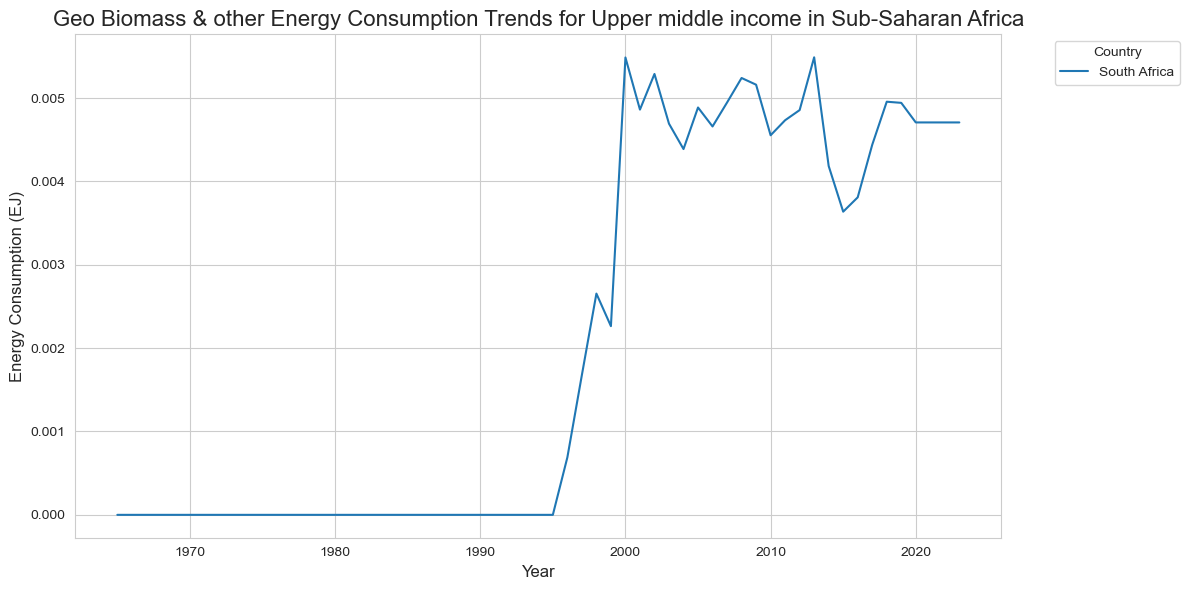

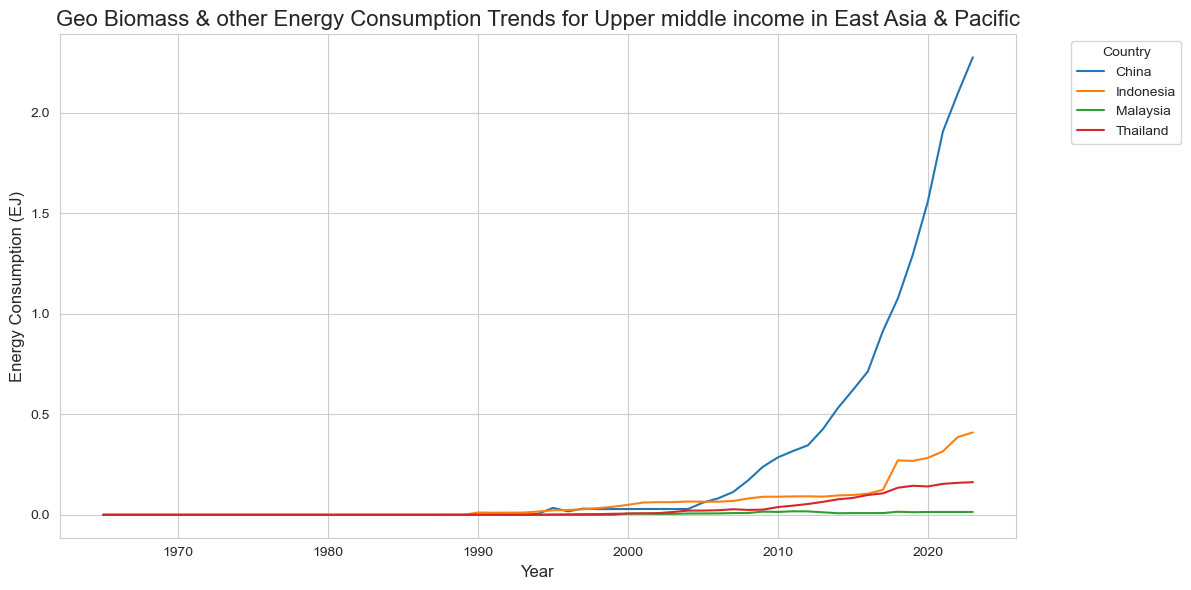

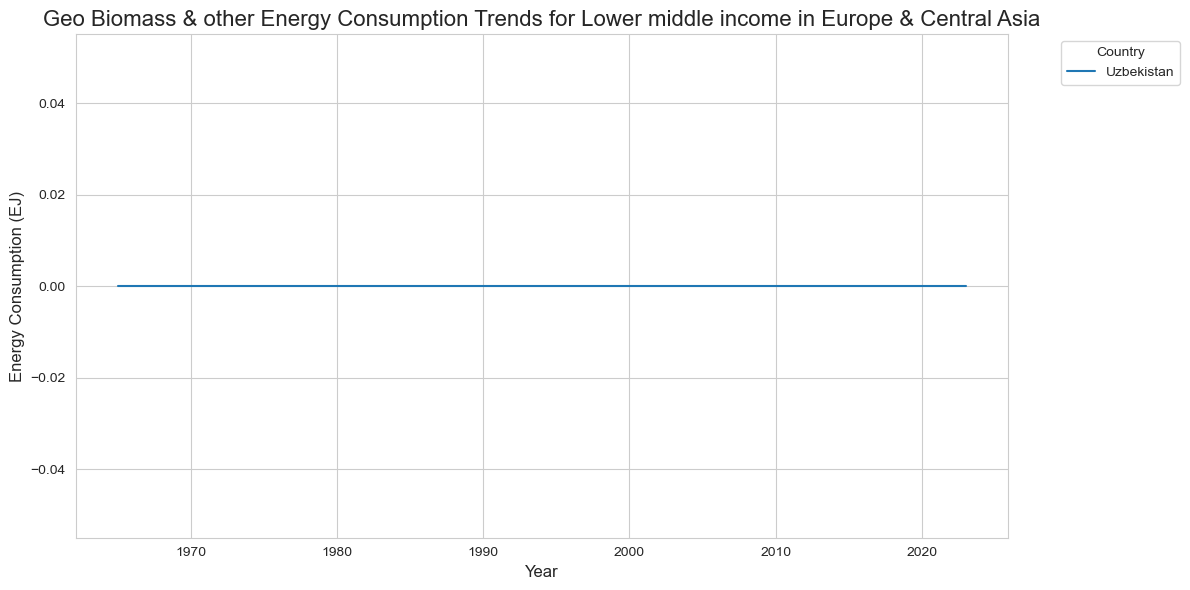

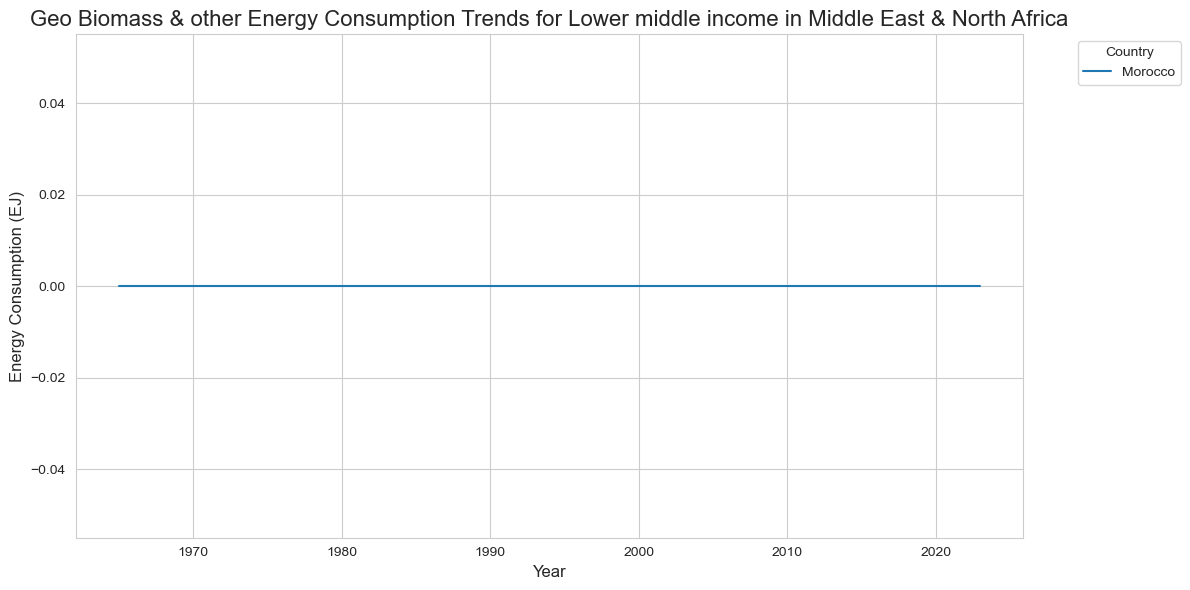

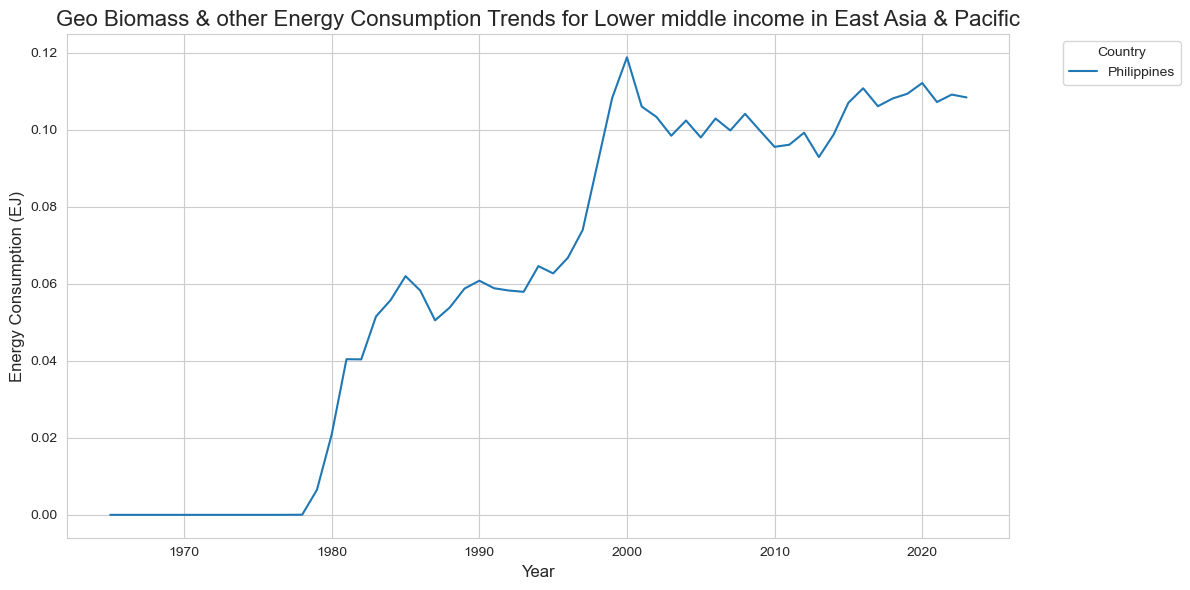

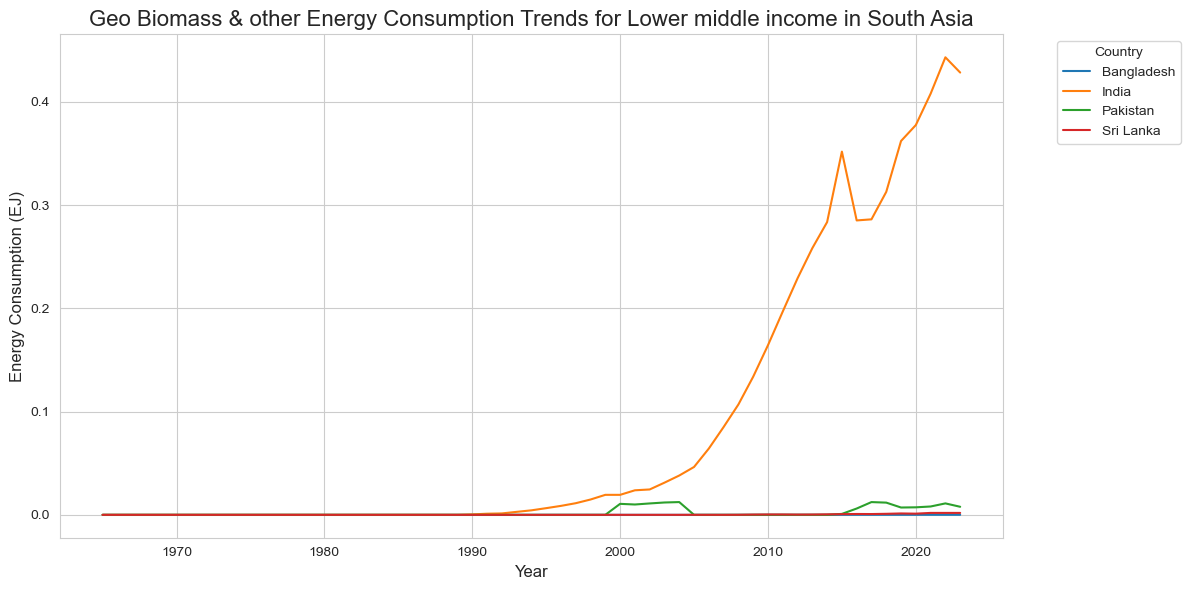

In [30]:
# Creating a list of unique income groups
income_groups = df['Income group'].unique()

# Creating a list of unique regions
regions = df['Region'].unique()

# Creating separate plots for each combination of income group and region
for income_group in income_groups:
    for region in regions:
        # Filter data for the current income group and region, and select only 'Solar' fuel type
        df_filtered = df[(df['Income group'] == income_group) & (df['Region'] == region) & (df['Fuel type'] == 'Geo Biomass & other')]
        
        # Check if there is data for the current combination
        if not df_filtered.empty:
            
            # Creating a plot for the current income group and region
            plt.figure(figsize=(12, 6))
            
            # Plotting the trend for Solar energy consumption for each country in this income group and region
            sns.lineplot(data=df_filtered, x="Year", y="Energy Consumption EJ", hue="Country", markers=True)
            
            # Title and labels
            plt.title(f"Geo Biomass & other Energy Consumption Trends for {income_group} in {region}", fontsize=16)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Energy Consumption (EJ)", fontsize=12)
            
            # Showing the legend
            plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
            
            plt.tight_layout()
            plt.show()

<b>Also the Geo Biomass & other fuel type use shows a considerable increase regardless of region or income group in most cases.

<b>Hydropower

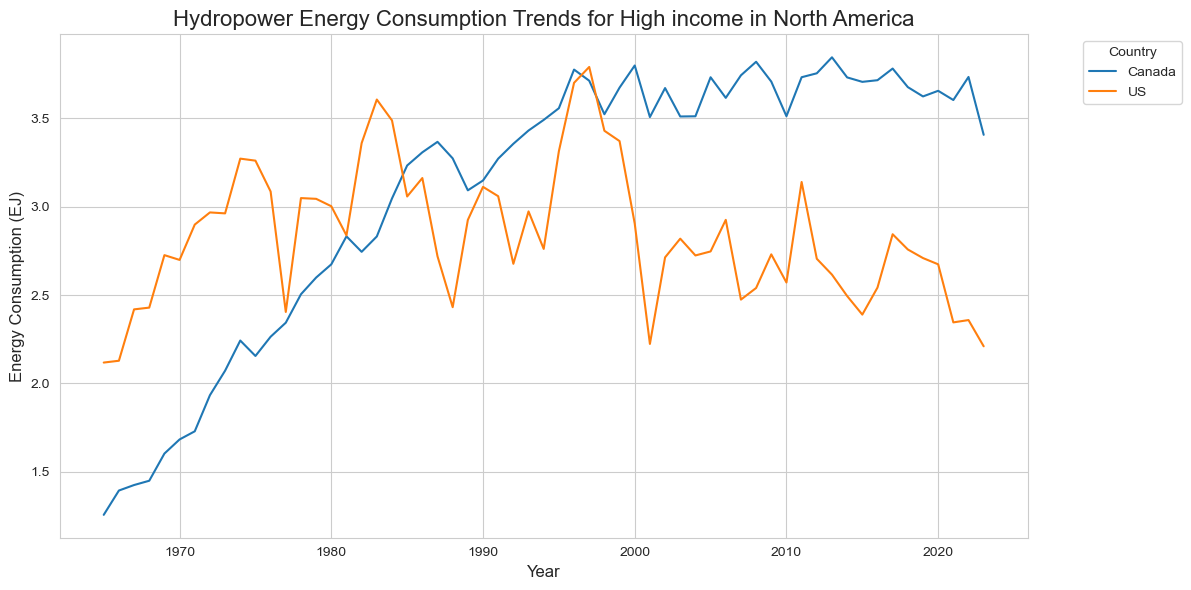

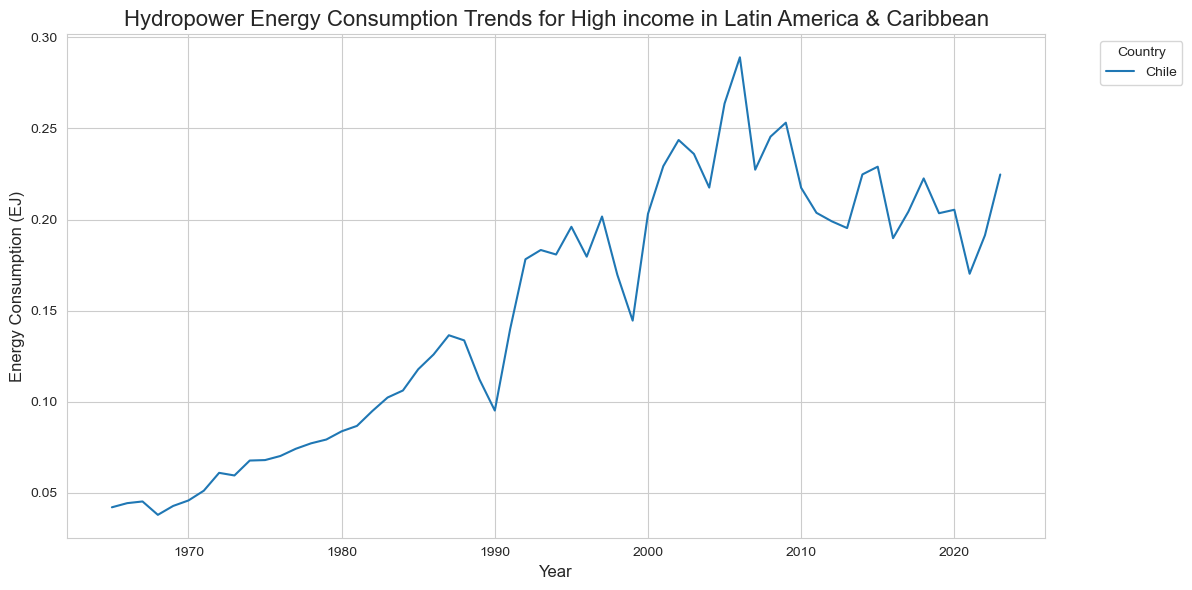

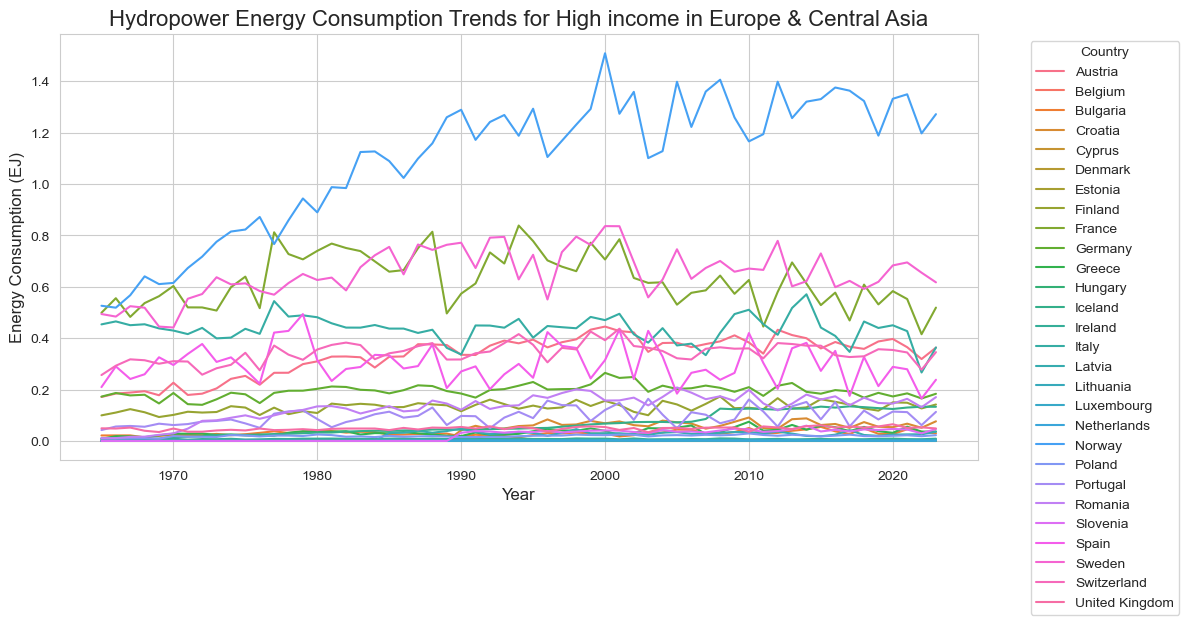

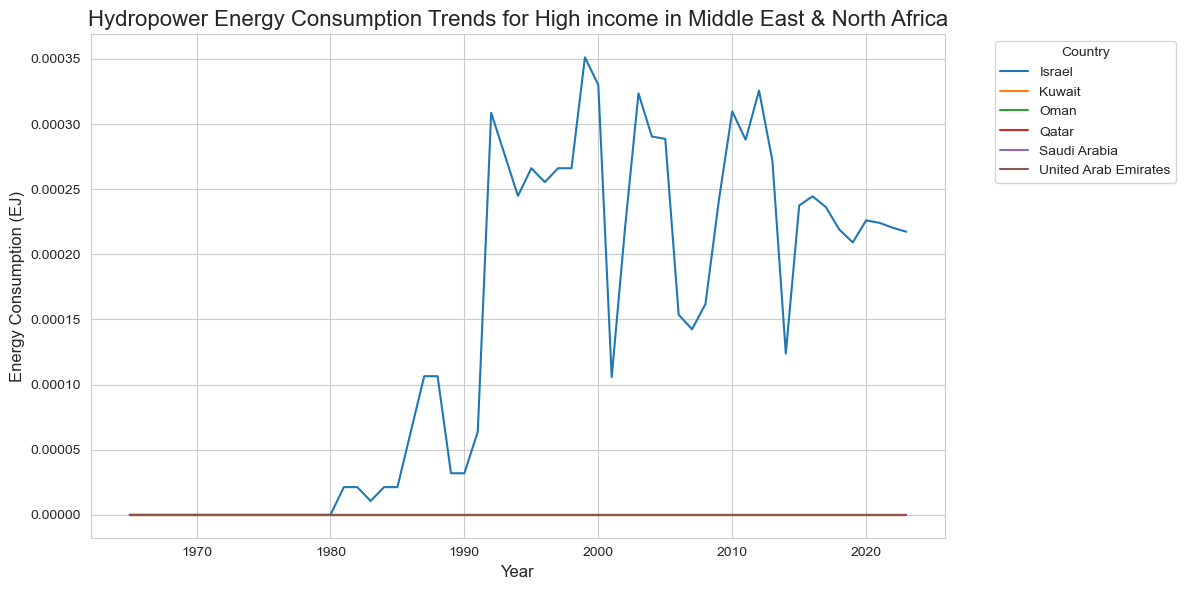

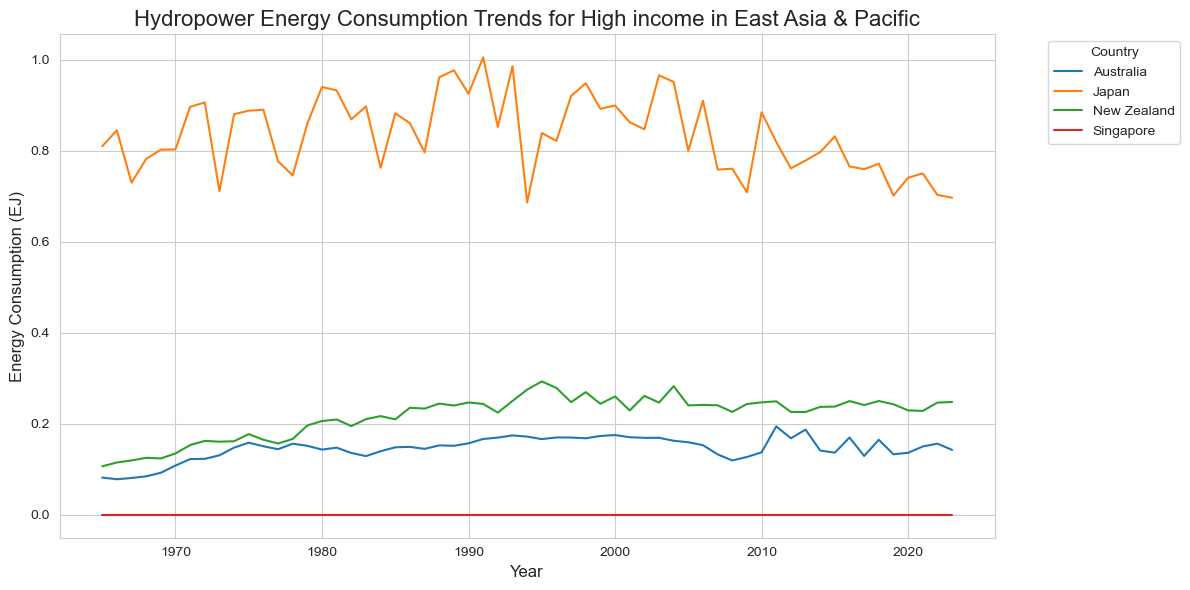

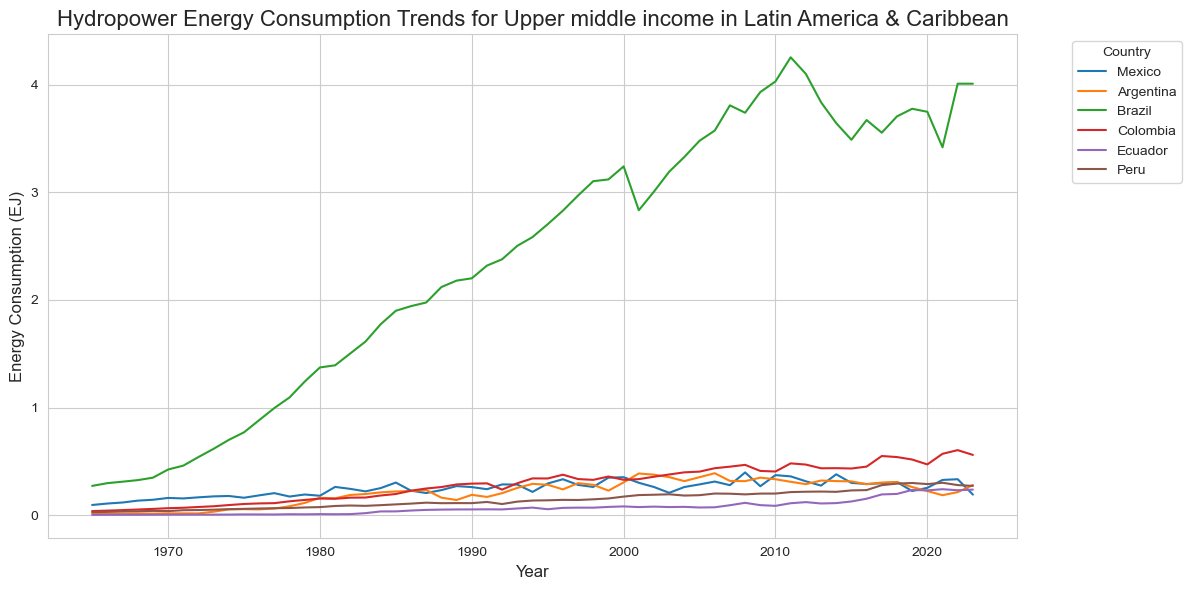

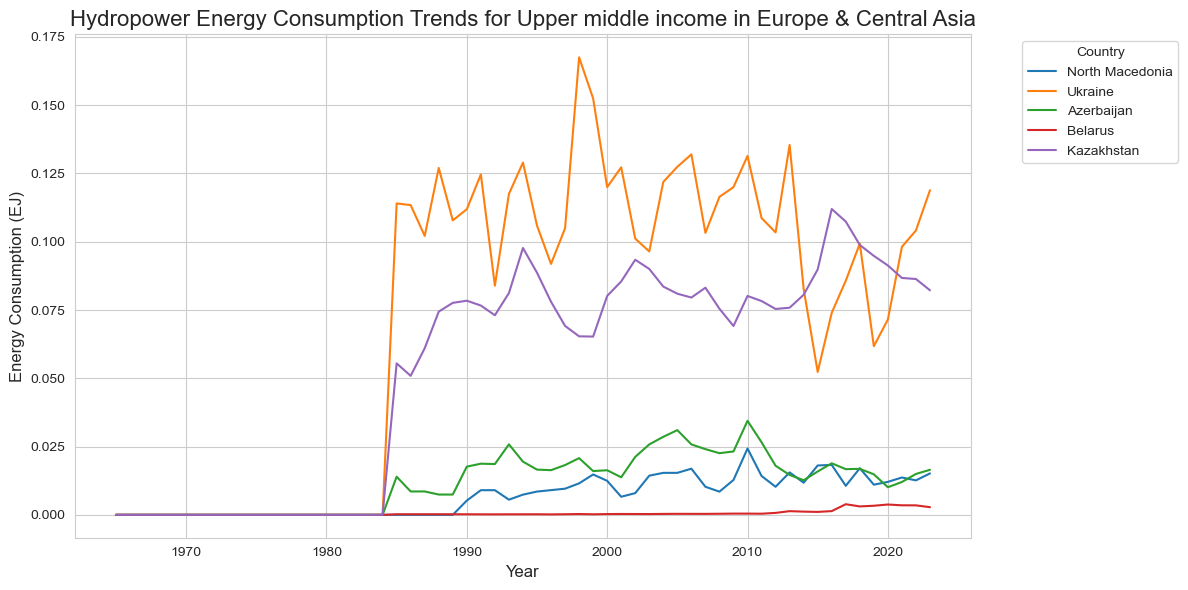

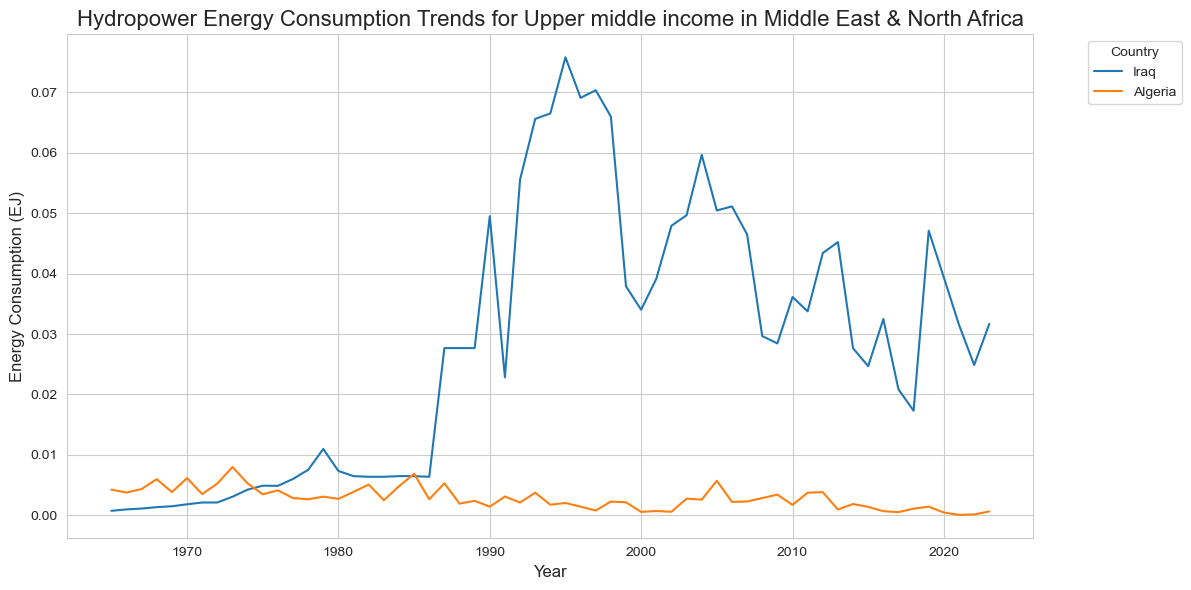

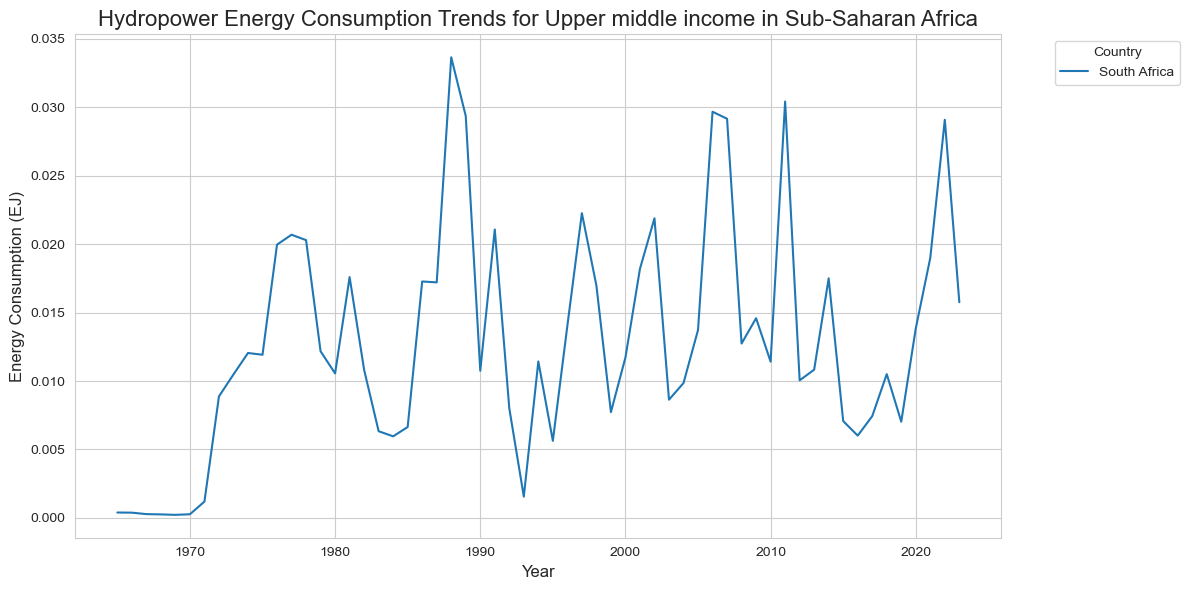

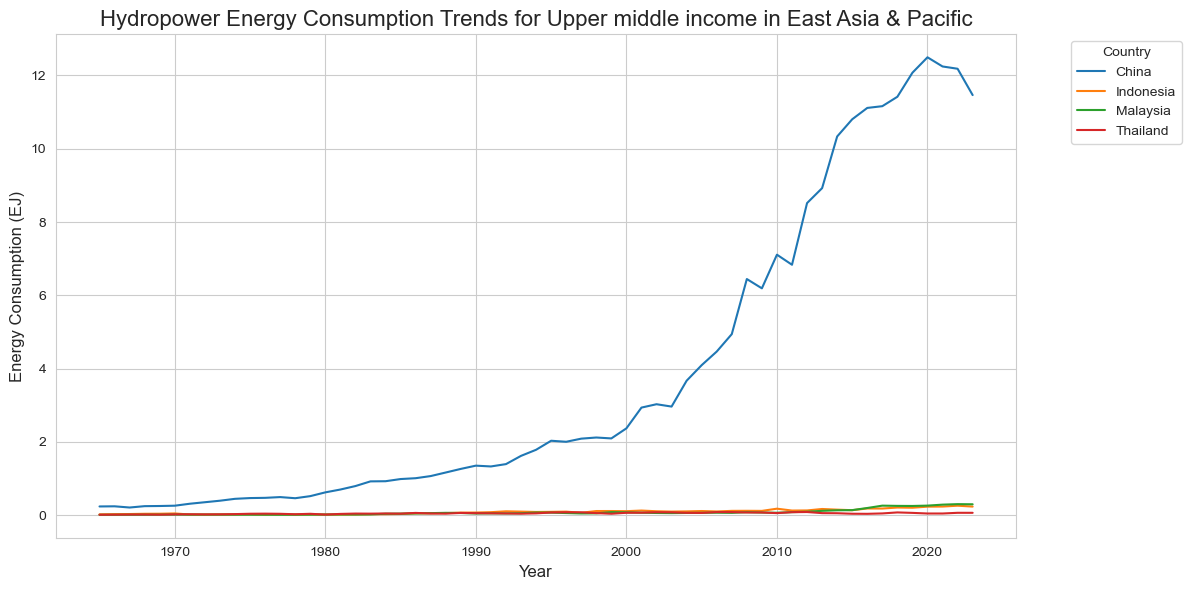

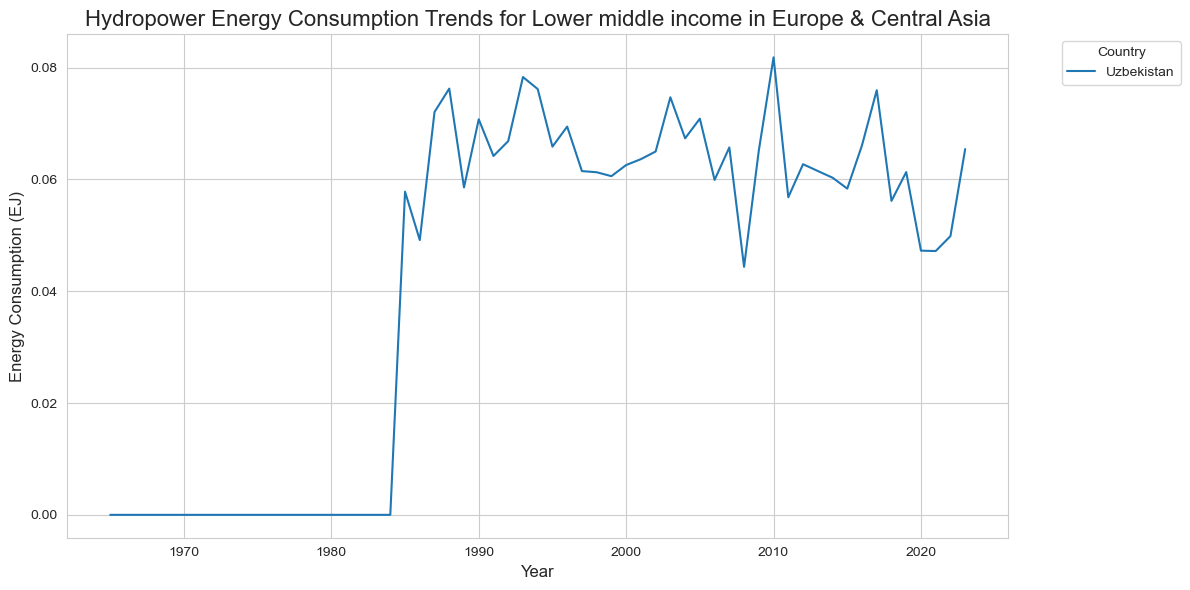

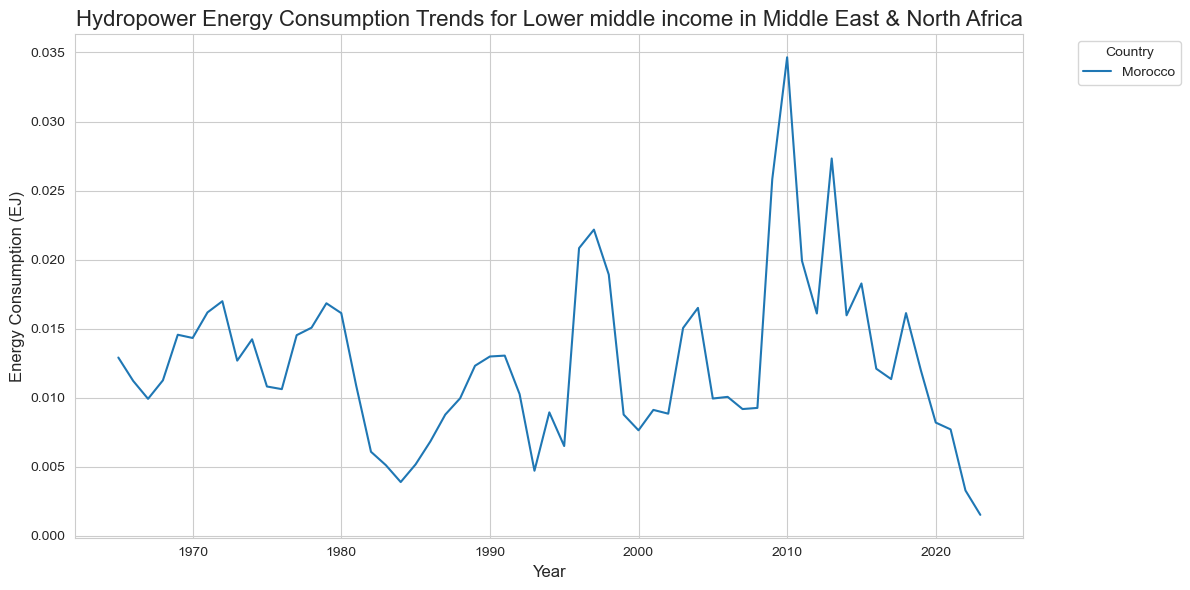

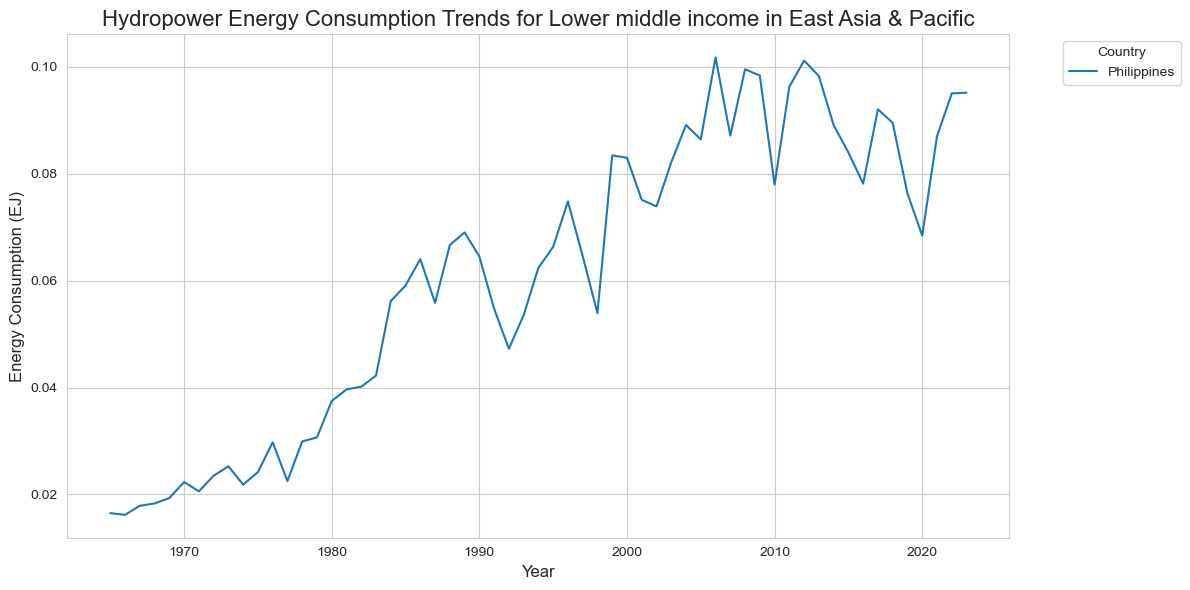

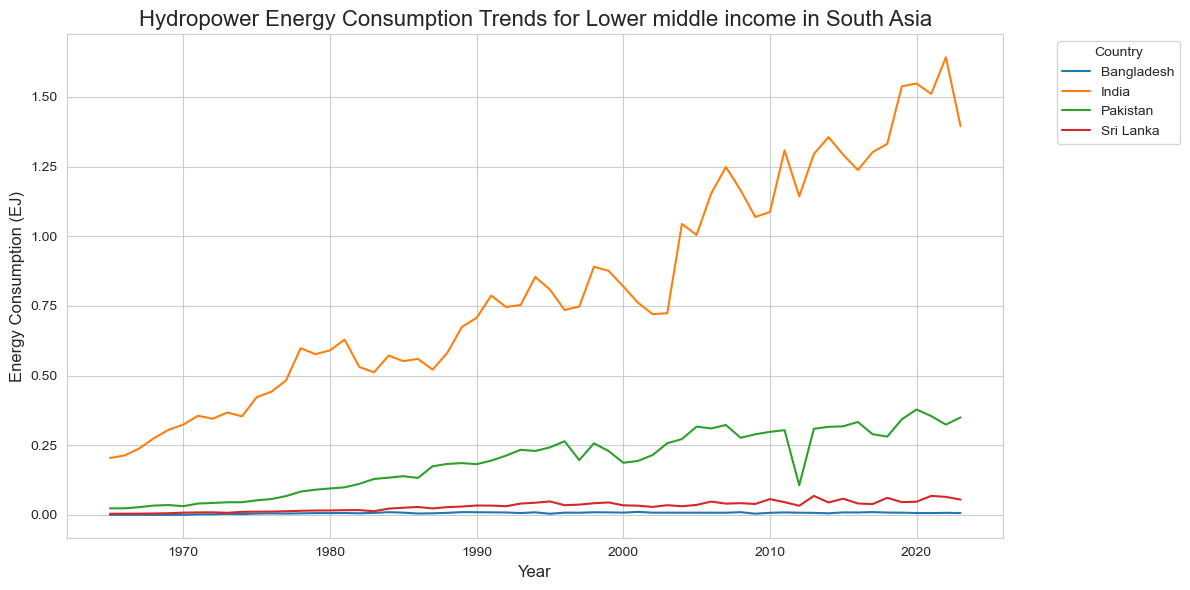

In [33]:
# Creating a list of unique income groups
income_groups = df['Income group'].unique()

# Creating a list of unique regions
regions = df['Region'].unique()

# Creating separate plots for each combination of income group and region
for income_group in income_groups:
    for region in regions:
        # Filter data for the current income group and region, and select only 'Solar' fuel type
        df_filtered = df[(df['Income group'] == income_group) & (df['Region'] == region) & (df['Fuel type'] == 'Hydropower')]
        
        # Check if there is data for the current combination
        if not df_filtered.empty:
            
            # Creating a plot for the current income group and region
            plt.figure(figsize=(12, 6))
            
            # Plotting the trend for Solar energy consumption for each country in this income group and region
            sns.lineplot(data=df_filtered, x="Year", y="Energy Consumption EJ", hue="Country", markers=True)
            
            # Title and labels
            plt.title(f"Hydropower Energy Consumption Trends for {income_group} in {region}", fontsize=16)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Energy Consumption (EJ)", fontsize=12)
            
            # Showing the legend
            plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
            
            plt.tight_layout()
            plt.show()

<b>Hydropower also exhibits a steady increase in many countries, though its trend is not as smooth. This is due to the inherent nature of the fuel type, which depends on water availability. Variations in water levels, driven by factors like rainfall, seasonal changes, and geographic conditions, can cause fluctuations in hydropower generation.

<b>Wind

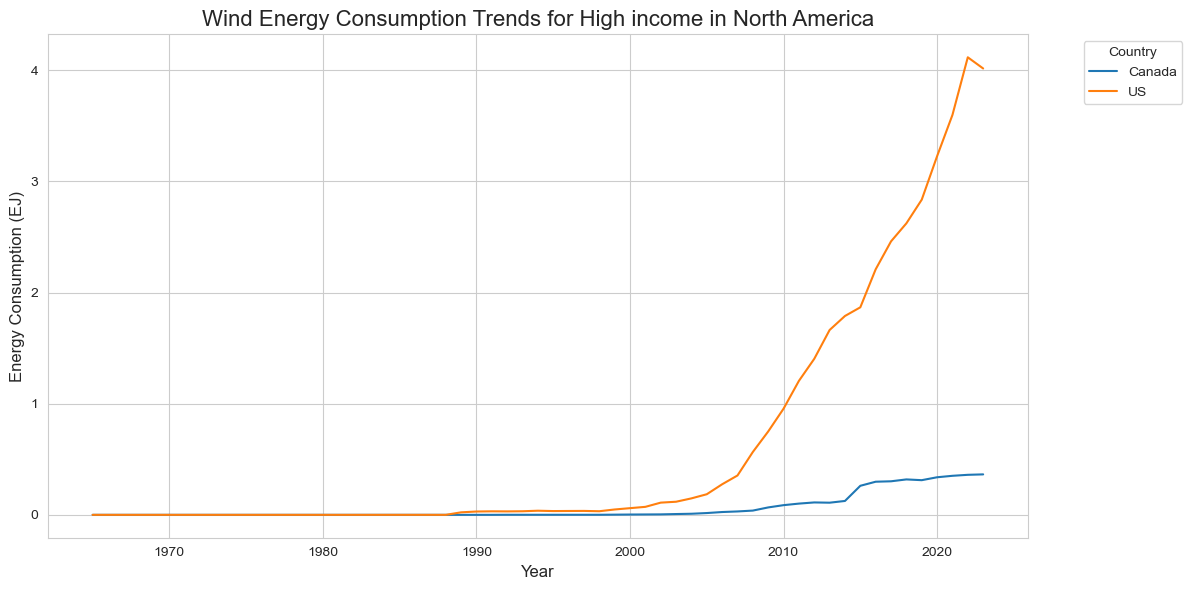

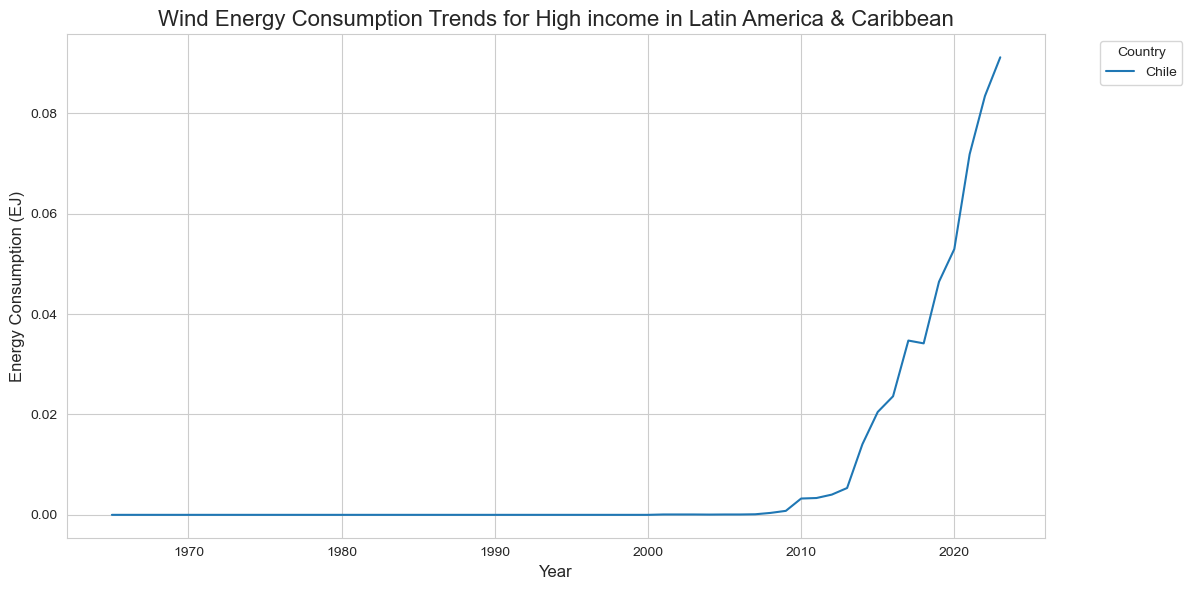

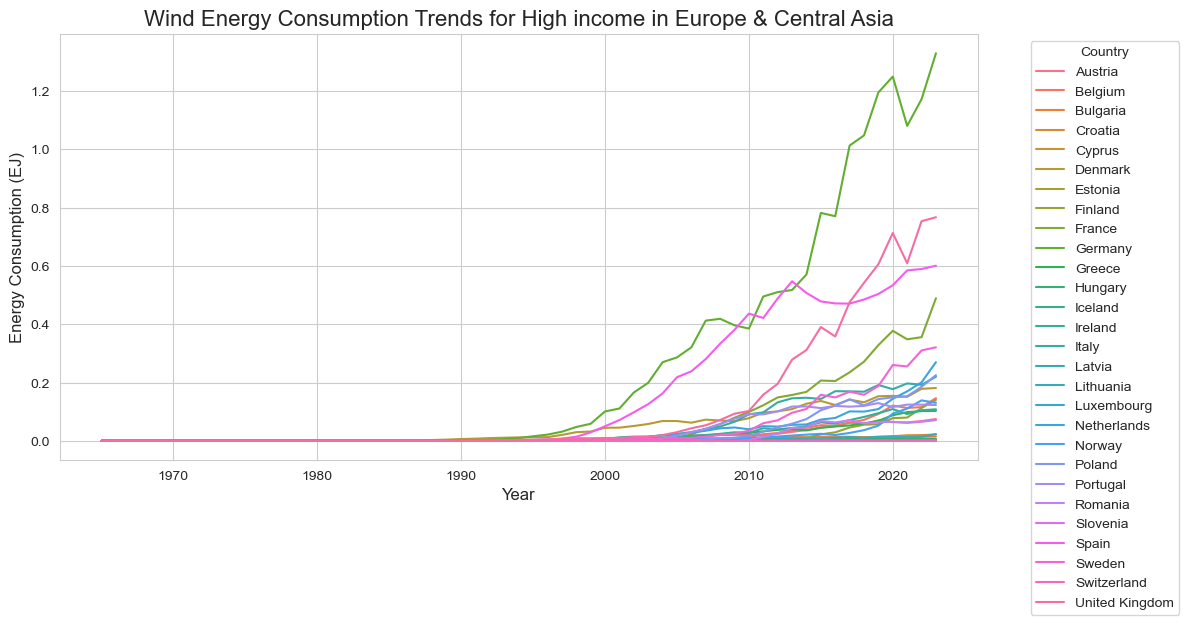

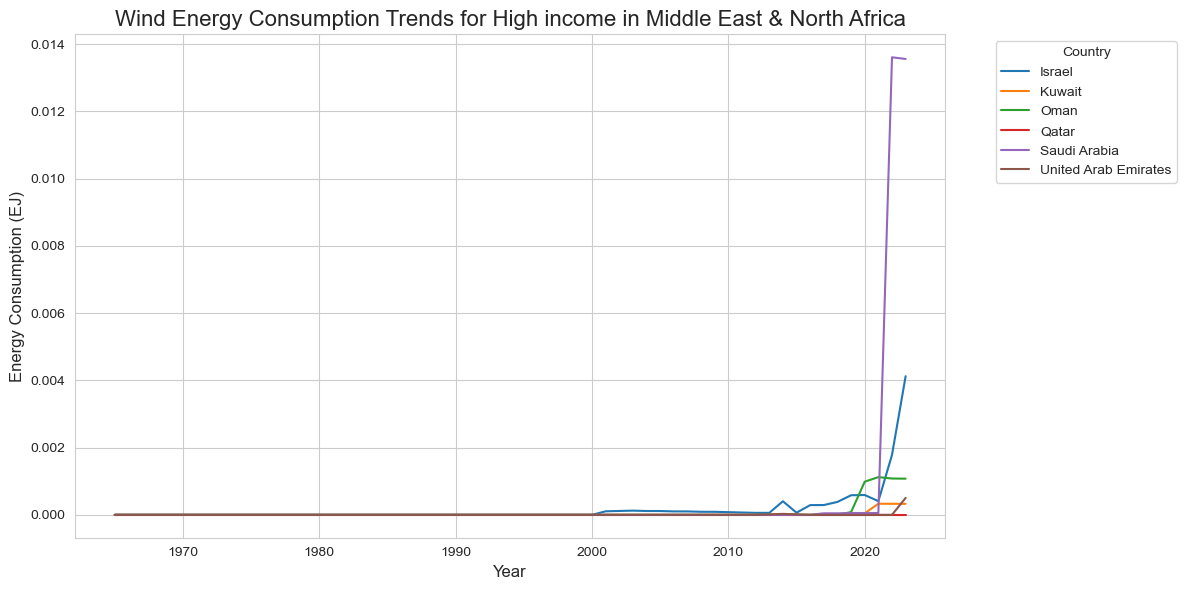

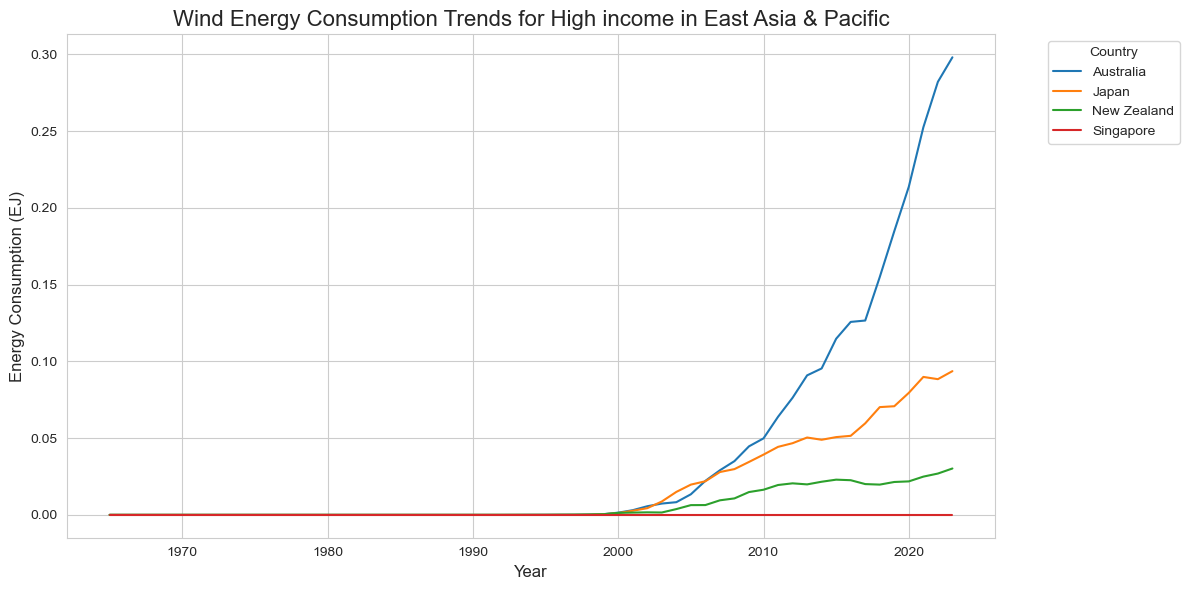

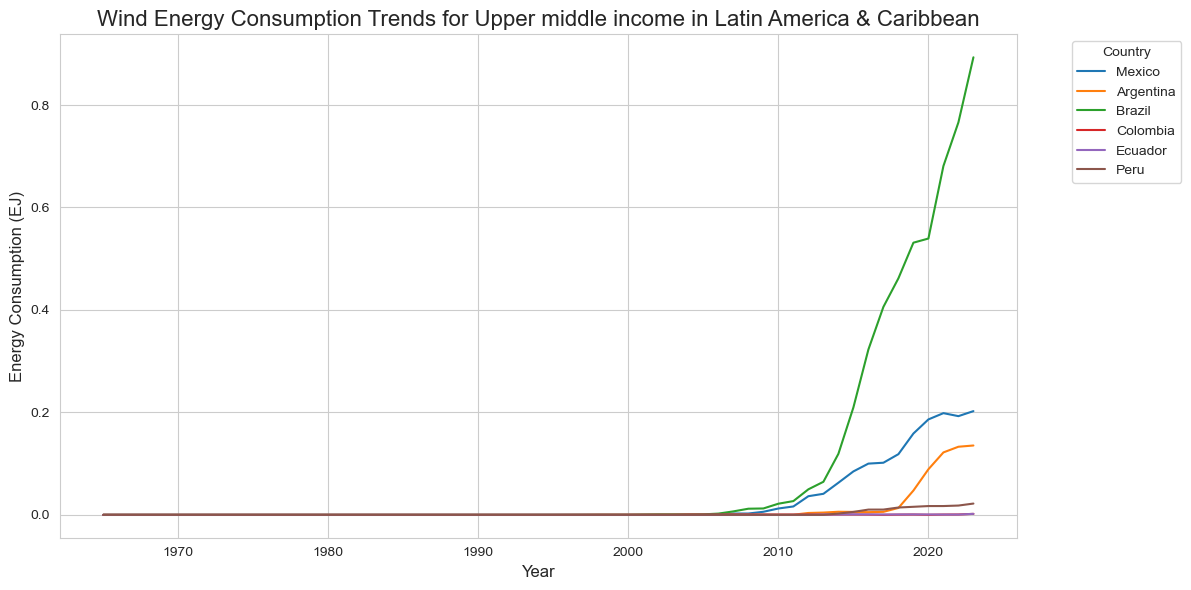

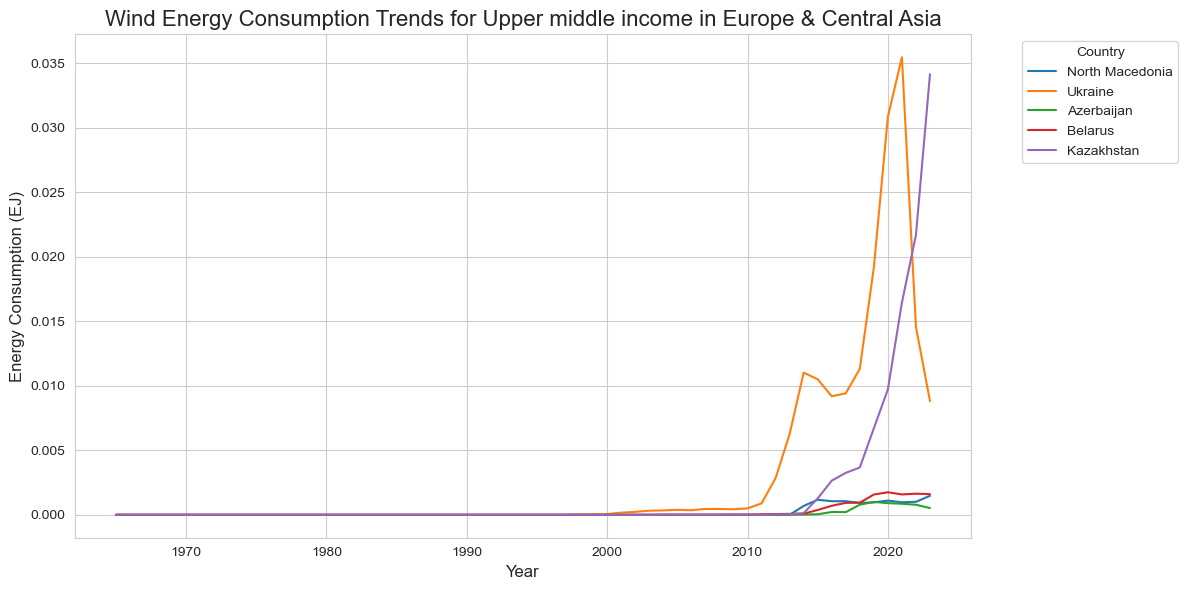

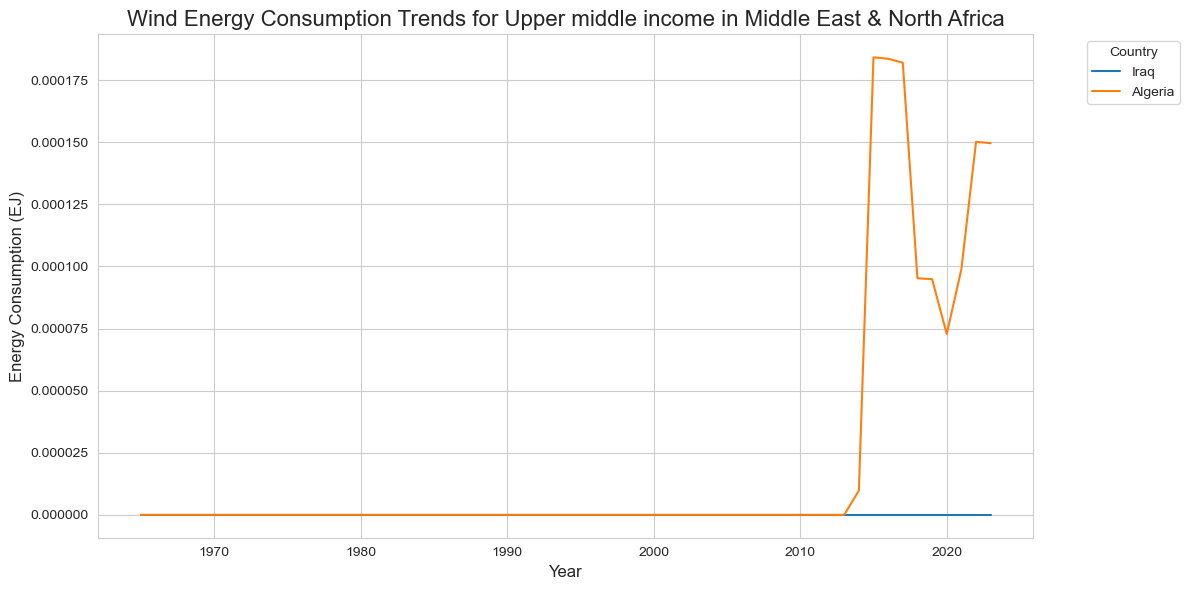

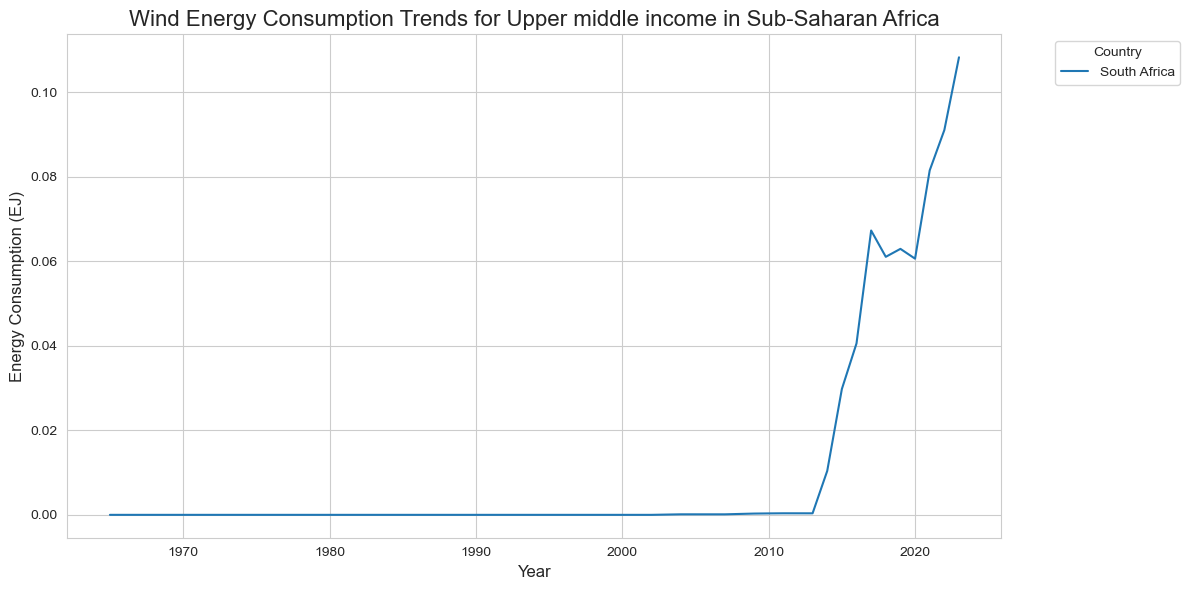

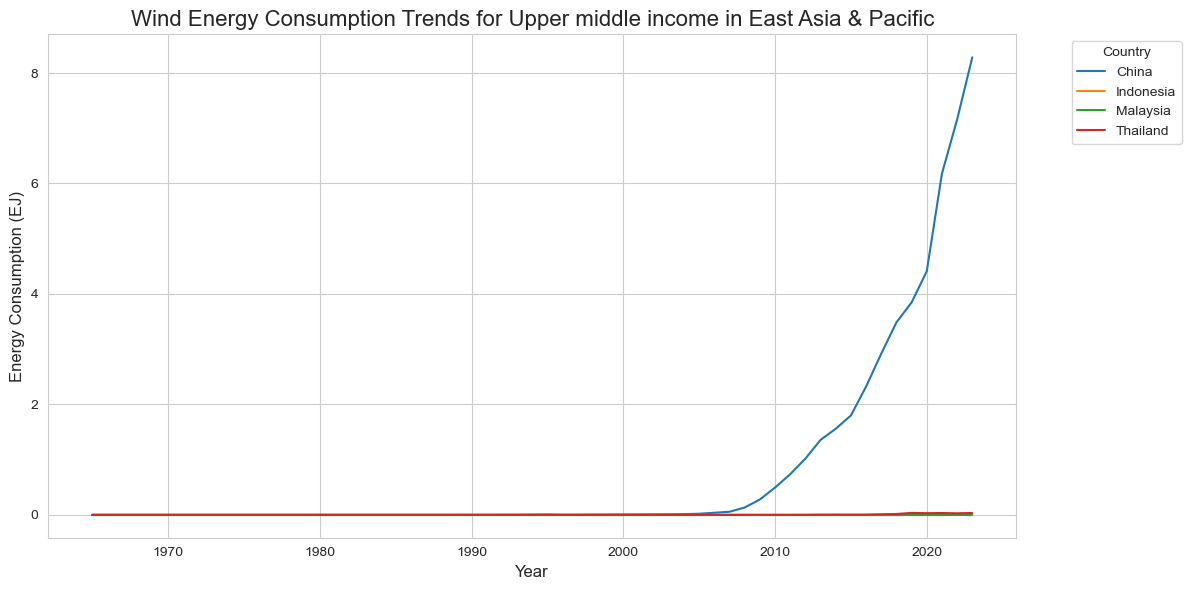

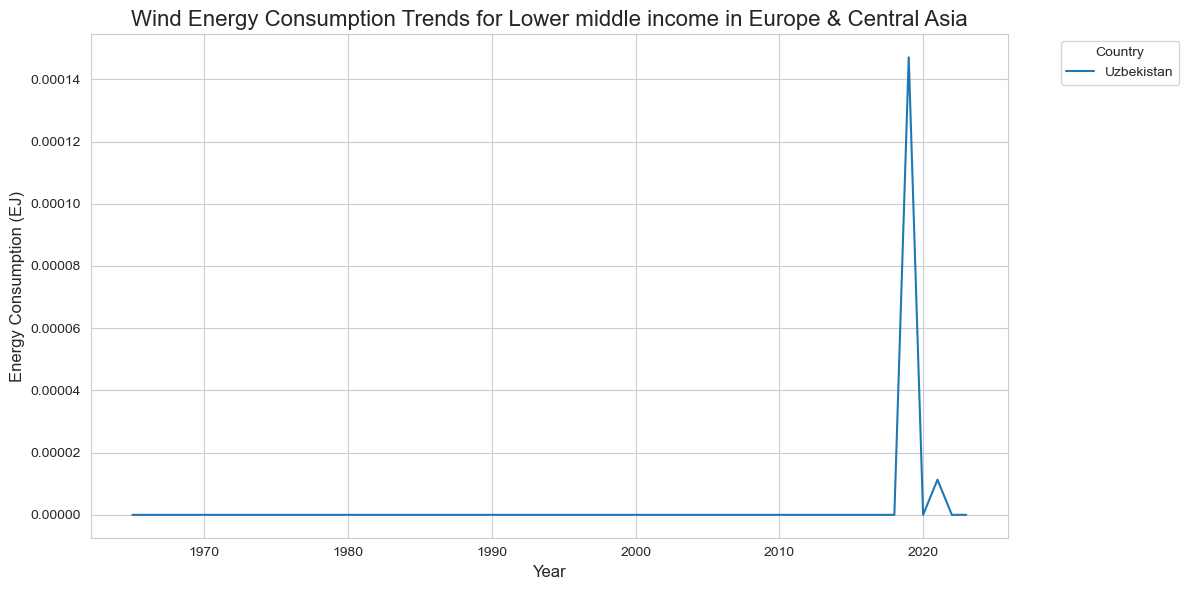

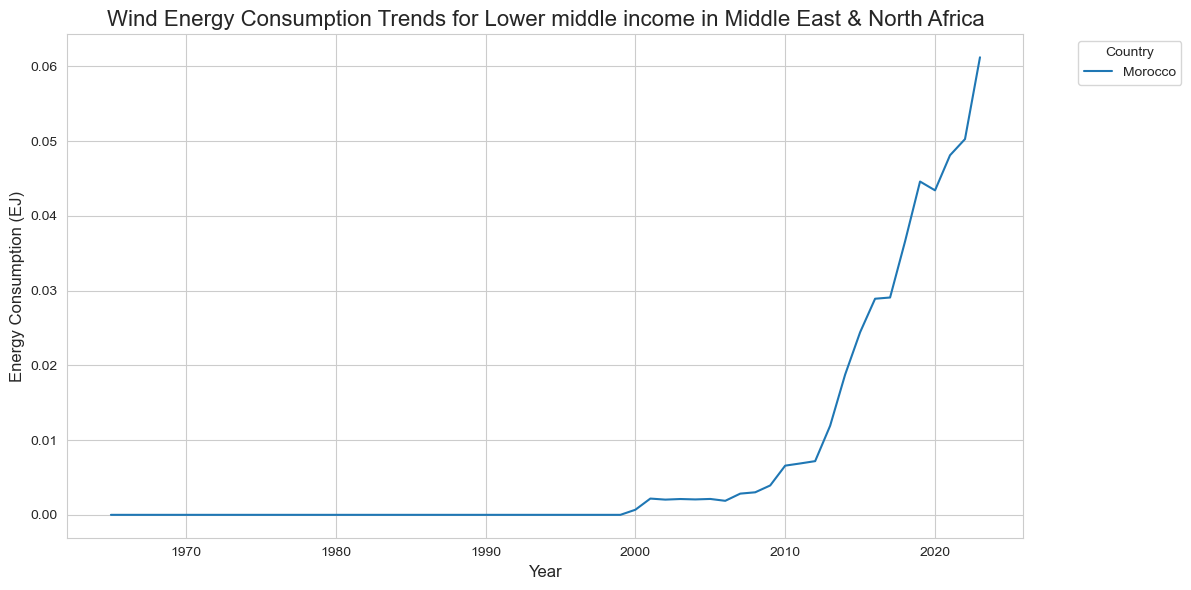

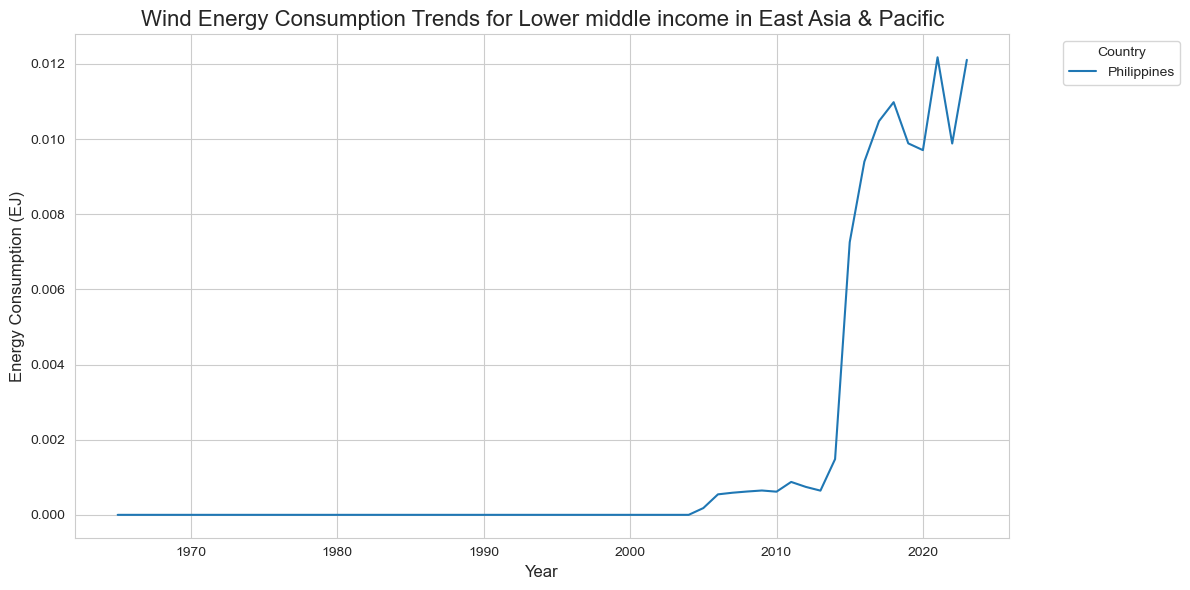

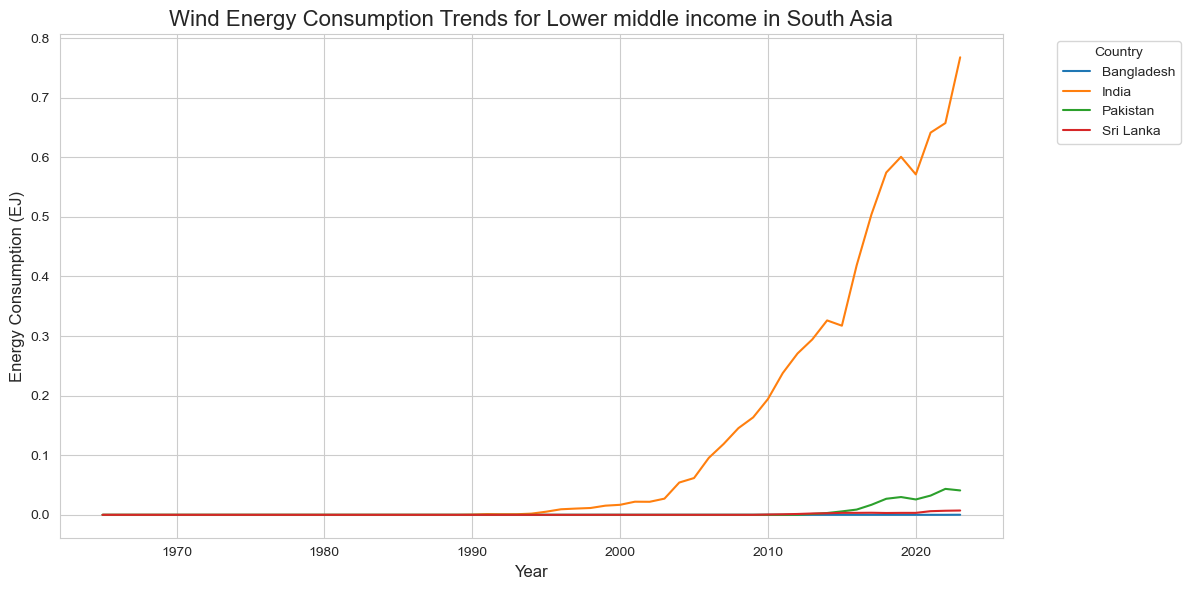

In [36]:
# Creating a list of unique income groups
income_groups = df['Income group'].unique()

# Creating a list of unique regions
regions = df['Region'].unique()

# Creating separate plots for each combination of income group and region
for income_group in income_groups:
    for region in regions:
        # Filter data for the current income group and region, and select only 'Solar' fuel type
        df_filtered = df[(df['Income group'] == income_group) & (df['Region'] == region) & (df['Fuel type'] == 'Wind')]
        
        # Check if there is data for the current combination
        if not df_filtered.empty:
            
            # Creating a plot for the current income group and region
            plt.figure(figsize=(12, 6))
            
            # Plotting the trend for Solar energy consumption for each country in this income group and region
            sns.lineplot(data=df_filtered, x="Year", y="Energy Consumption EJ", hue="Country", markers=True)
            
            # Title and labels
            plt.title(f"Wind Energy Consumption Trends for {income_group} in {region}", fontsize=16)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Energy Consumption (EJ)", fontsize=12)
            
            # Showing the legend
            plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
            
            plt.tight_layout()
            plt.show()

<b>Wind power, like the other renewable energy sources such as 'Geo Biomass & other', 'Hydropower', and 'Solar', shows a steady increase in usage across most countries. This upward trend in renewable energy consumption is encouraging, as it signals a positive shift towards a more sustainable and greener future for the world.

<b>Global Energy Consumption Per Capita: Analyzing 2020 Trends by Fuel Type

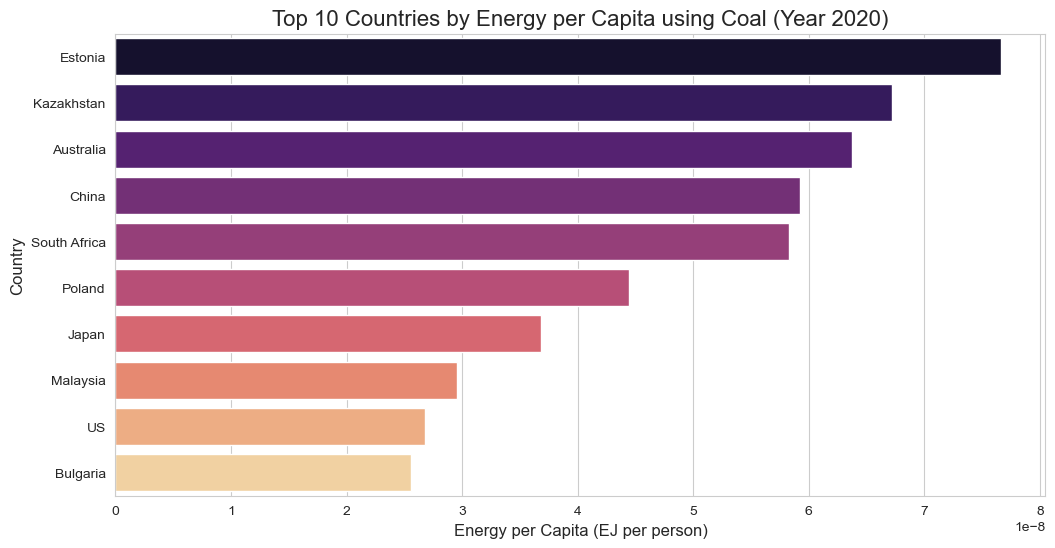

In [39]:
# Filter the dataset for the year 2020 and coal as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Coal")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Coal (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>Eastern Europe (Estonia, Poland, Bulgaria) and Asia (China, Japan, Malaysia) still rely heavily on coal.
Australia and South Africa are major coal exporters, so high domestic consumption isn’t surprising.
China being on this list is expected, as it has the world’s largest coal consumption overall.

<b>Despite global efforts to move away from coal, some countries still have a high per capita reliance, particularly those with domestic coal resources or historical dependence.

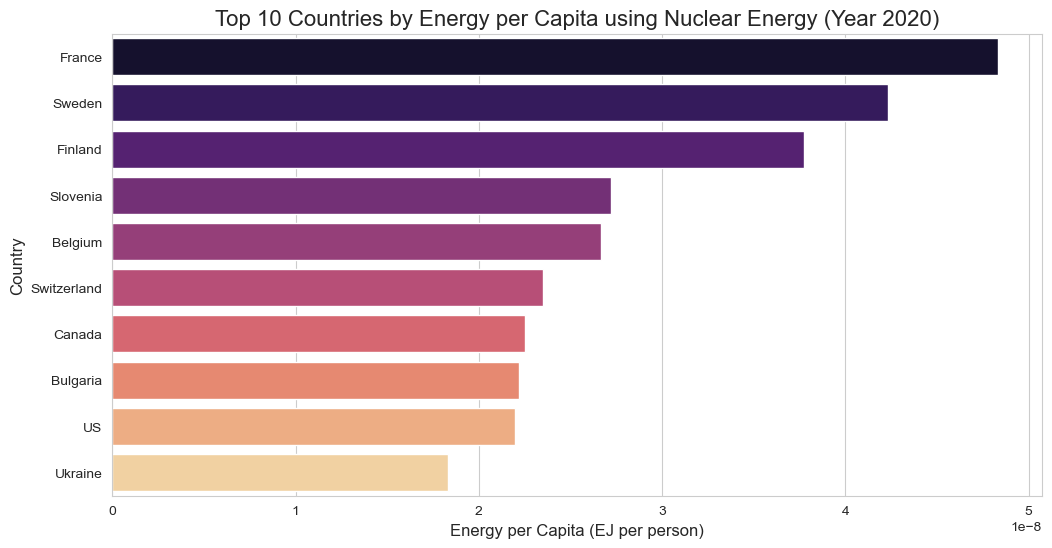

In [40]:
# Filter the dataset for the year 2020 and Nuclear Energy as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Nuclear Energy")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Nuclear Energy (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>France leads the world in nuclear energy per capita, which aligns with its government’s energy strategy.
Scandinavian countries (Sweden, Finland) and Switzerland have a strong nuclear presence due to their focus on low-carbon energy.
Bulgaria, US and Ukraine show high nuclear reliance.

<b>Nuclear power is a preferred choice in Europe for stable, low-carbon electricity, but fewer Asian or Middle Eastern countries appear on the list.

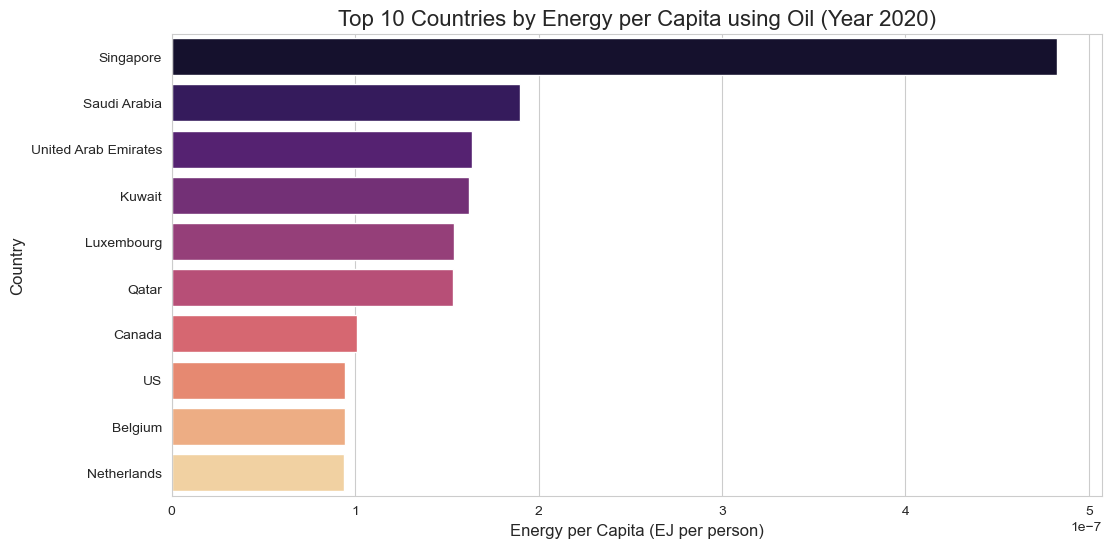

In [41]:
# Filter the dataset for the year 2020 and Oil as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Oil")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Oil (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>Middle Eastern countries (Saudi Arabia, UAE, Kuwait, Qatar) dominate, likely due to oil wealth and subsidized fuel prices.
Singapore stands out—its small size but huge oil refining industry means high per capita consumption.
Luxembourg and Netherlands have high transportation fuel consumption, possibly due to fuel tourism and logistics hubs.

<b>This list is dominated by wealthy nations and oil-producing countries, where oil is either subsidized or a major economic driver.

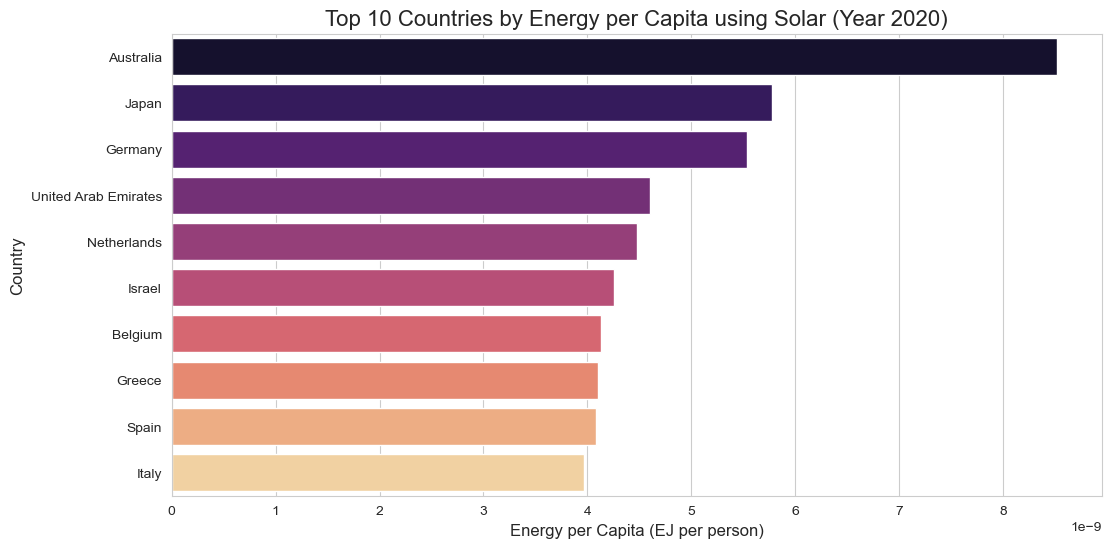

In [42]:
# Filter the dataset for the year 2020 and Solar as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Solar")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Solar (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>Australia tops the list and is considered a global leader in rooftop solar power, with a significant portion of its households utilizing solar panels, generating over 10% of the country's electricity through rooftop solar, making it one of the largest sources of renewable energy in the nation; this high adoption rate is largely due to favorable sunlight conditions and government incentives encouraging residential solar installations. 

<b>Japan has significantly increased its reliance on solar power in recent years, with solar energy now accounting for a substantial portion of its electricity generation, largely driven by the push for renewable energy following the 2011 Fukushima nuclear disaster; the country aims to further expand its solar capacity to meet ambitious carbon reduction goals by 2030 and beyond, even exploring innovative technologies like perovskite solar cells (PSCs) to achieve this aim. 

<b>Germany, Netherlands, Belgium, and Spain have invested heavily in solar despite less favorable climates.
UAE and Israel indicate a growing solar shift in the Middle East, where solar is an ideal renewable option.

<b>Countries with strong government policies or abundant sunlight lead in solar power adoption. Some cloudy nations (Germany, Netherlands) still push solar due to energy transition policies.

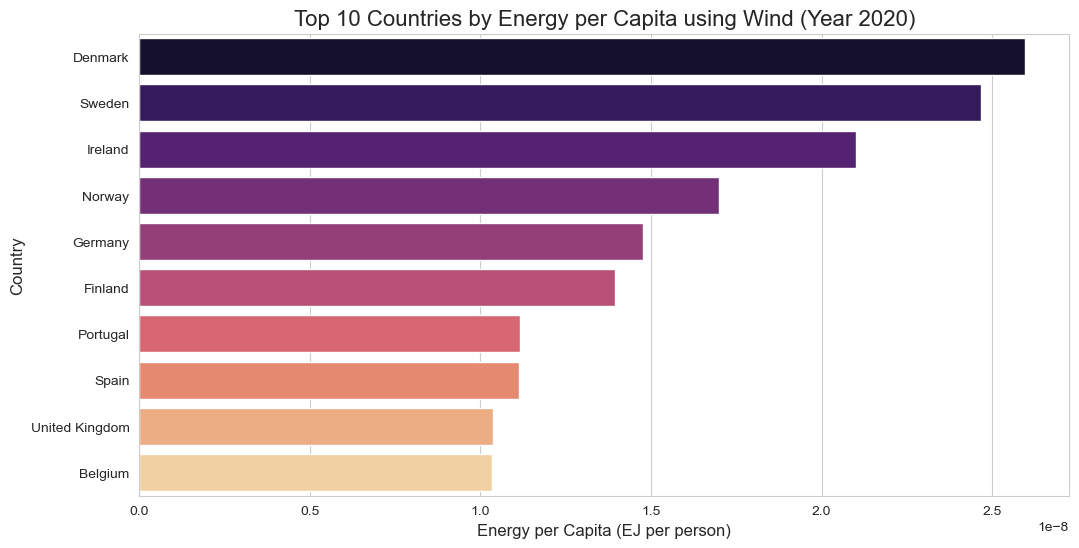

In [43]:
# Filter the dataset for the year 2020 and Wind as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Wind")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Wind (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>Denmark is considered a global leader in wind energy, generating a larger share of its electricity from wind power than any other country, with wind power often accounting for over half of its total electricity production; this leadership position is due to its early adoption of supportive policies, strong research and development in wind technology, and a significant focus on offshore wind farms. 

<b>Sweden has significantly expanded its use of wind energy in recent years, with wind power now contributing a substantial portion of the country's electricity generation, ranking among the top in Europe per capita; currently, wind power accounts for around 20.9% of Sweden's total electricity production, with plans to further increase capacity through large offshore wind projects. 

<b>Ireland, Norway, and Portugal have also aggressively expanded wind farms.
Germany, Spain, and the UK are major European wind energy players.

<b>Wind power dominance is strongest in Europe, with many coastal nations leveraging strong winds to generate clean energy.

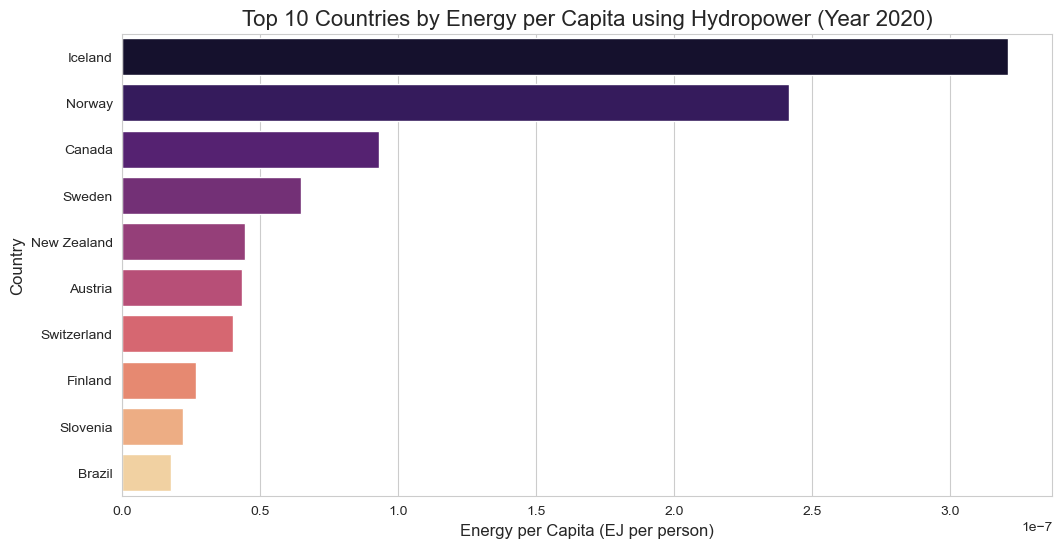

In [44]:
# Filter the dataset for the year 2020 and Hydropower as the fuel type
df_2020_coal = df[(df["Year"] == 2020) & (df["Fuel type"] == "Hydropower")].copy()

# Calculate Energy per Capita using only Coal energy consumption
df_2020_coal["Energy per Capita"] = df_2020_coal["Energy Consumption EJ"] / df_2020_coal["Population -2023"]

# Sort and select the top 10 countries based on coal energy per capita
df_sorted = df_2020_coal.sort_values("Energy per Capita", ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Energy per Capita", y="Country", palette="magma", hue='Country', legend=False)

# Titles and labels
plt.title("Top 10 Countries by Energy per Capita using Hydropower (Year 2020)", fontsize=16)
plt.xlabel("Energy per Capita (EJ per person)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the chart
plt.show()

<b>Hydropower is a vital part of Iceland's energy mix, supplying electricity and heat to the country. Iceland's hydropower comes from meltwater rivers from glaciers. Over 70% of Iceland's electricity comes from hydropower. The largest hydroelectric power station in Iceland is Kárahnjúkar Hydropower Plant. Iceland's national power company, Landsvirkjun, has included climate change adaptation in its management, design, and expansion of its assets. 

<b>Hydropower is still the mainstay of the Norwegian electricity system. In a normal year, the Norwegian hydropower plants produce 136.49 TWh, which is about 88% of Norway's total power production. Average annual hydropower generation capacity in 2019 was around 131 TWh, about 95% of total electricity production.

<b>Canada, Sweden, and Switzerland use their mountainous terrain for large-scale hydropower projects.

<b>Brazil relies on hydropower to generate electricity, and has a large potential for future growth. Brazil uses more hydroelectric power than the world average, with over 90% of its electricity coming from hydropower. Brazil's installed capacity is around 114 GW, with an estimated potential of 260 GW. Brazil's rivers have a long history of flow measurements, which can help mitigate risk.
The Brazilian Federal Government has indicated that real interest rates will decrease in the coming years, which could lead to higher return rates for hydroelectric power plants.

<b>Hydropower is dominant in countries with large rivers, mountainous terrain, and stable water resources. However, it's less common in dry regions like the Middle East.